In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/math-students/Math-Students.csv


In [2]:
df = pd.read_csv('/kaggle/input/math-students/Math-Students.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,MS,M,18,U,GT3,T,4,4,teacher,services,...,5,3,2,1,2,4,0,8,7,7
396,MS,M,17,U,GT3,T,4,4,teacher,services,...,5,3,2,1,2,4,0,8,7,7
397,MS,M,19,U,GT3,T,4,4,teacher,other,...,5,3,2,1,2,4,0,8,7,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,16.709273,2.761905,2.536341,1.443609,2.035088,0.330827,3.954887,3.233083,3.097744,1.476190,2.288221,3.558897,5.651629,10.879699,10.676692,10.380952
std,1.278225,1.096340,1.092716,0.695429,0.835020,0.740655,0.898335,0.994107,1.113178,0.887552,1.281737,1.384013,7.983113,3.315195,3.760845,4.571073
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.500000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Plot Section(Vizaulization)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

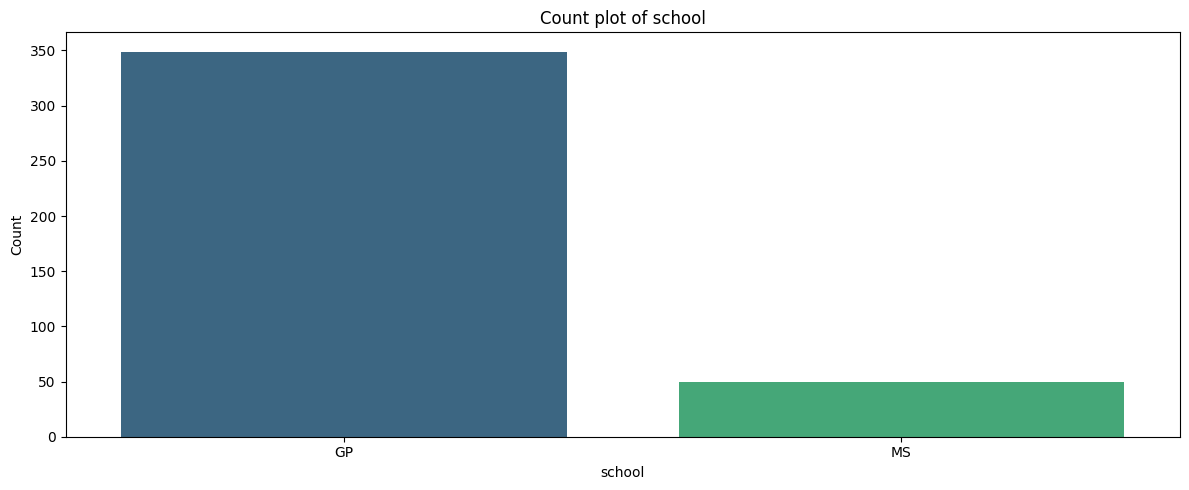

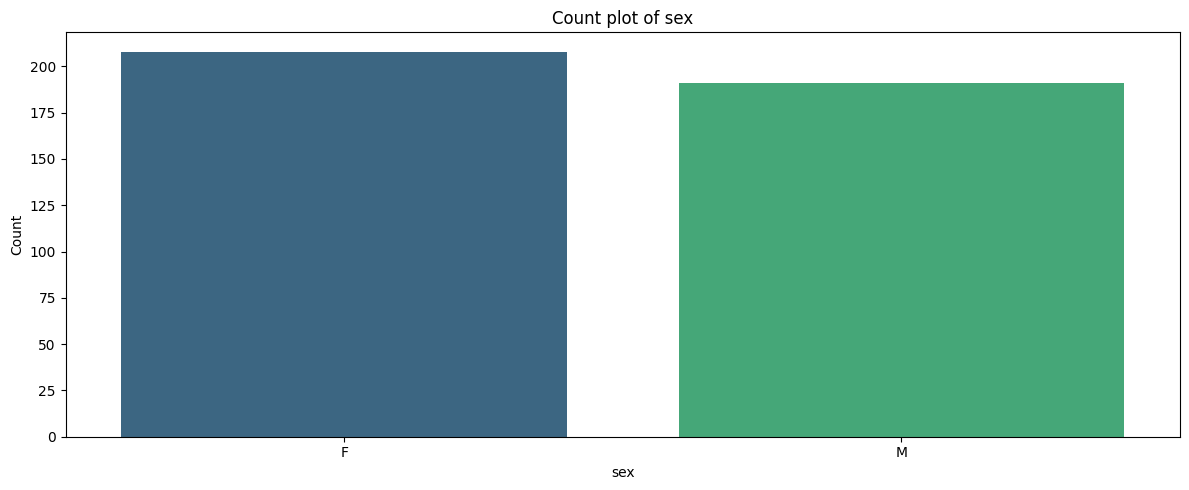

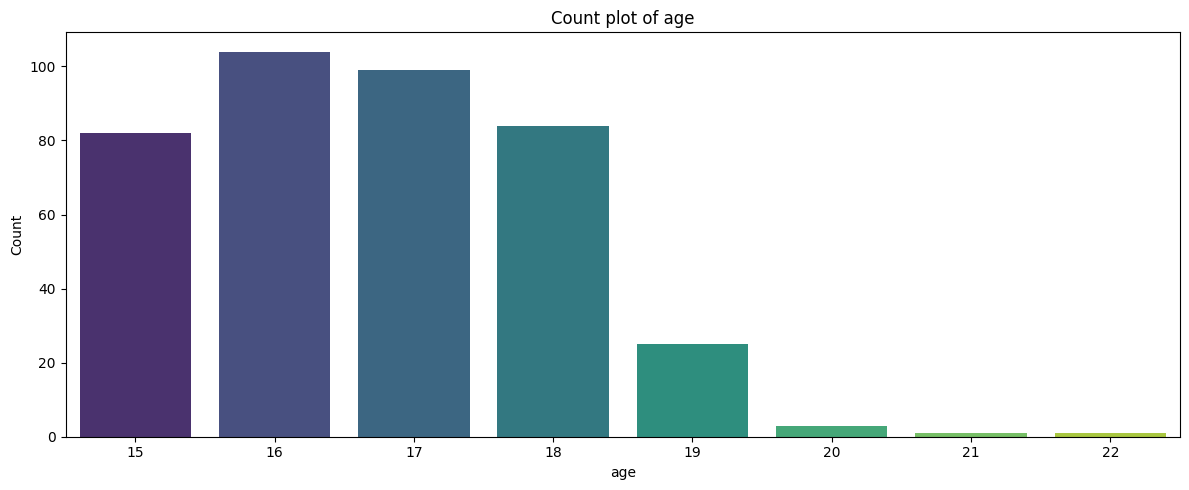

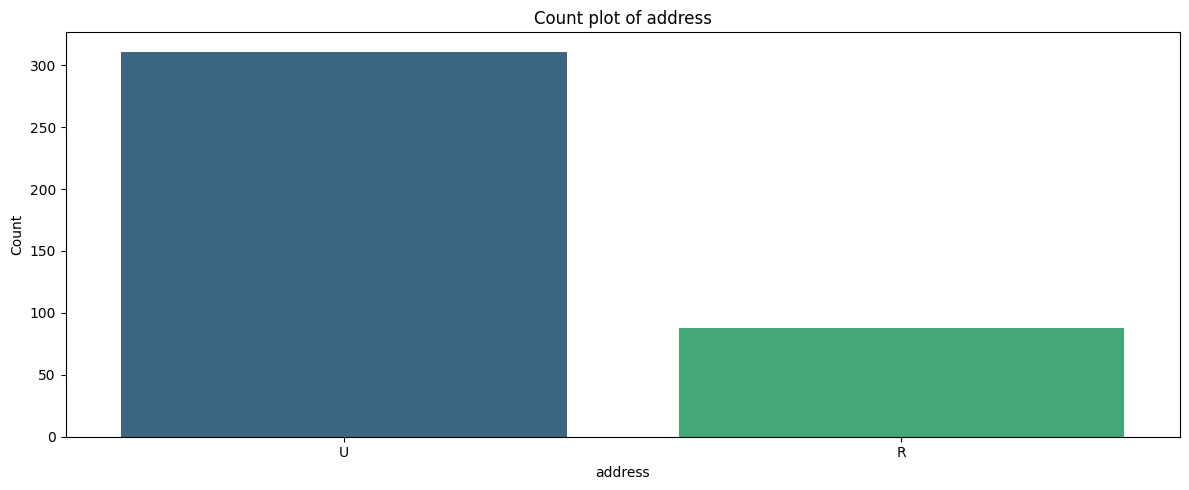

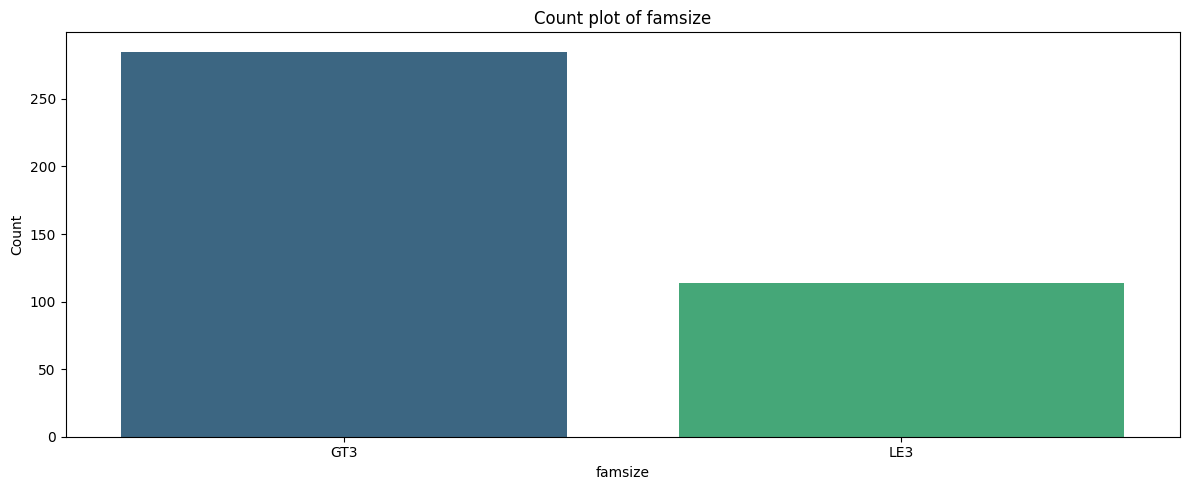

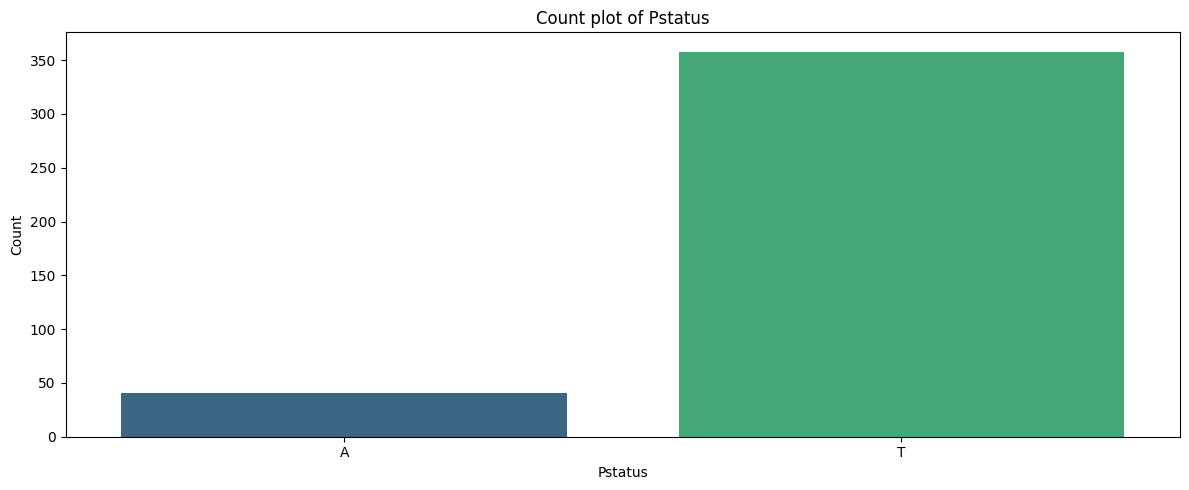

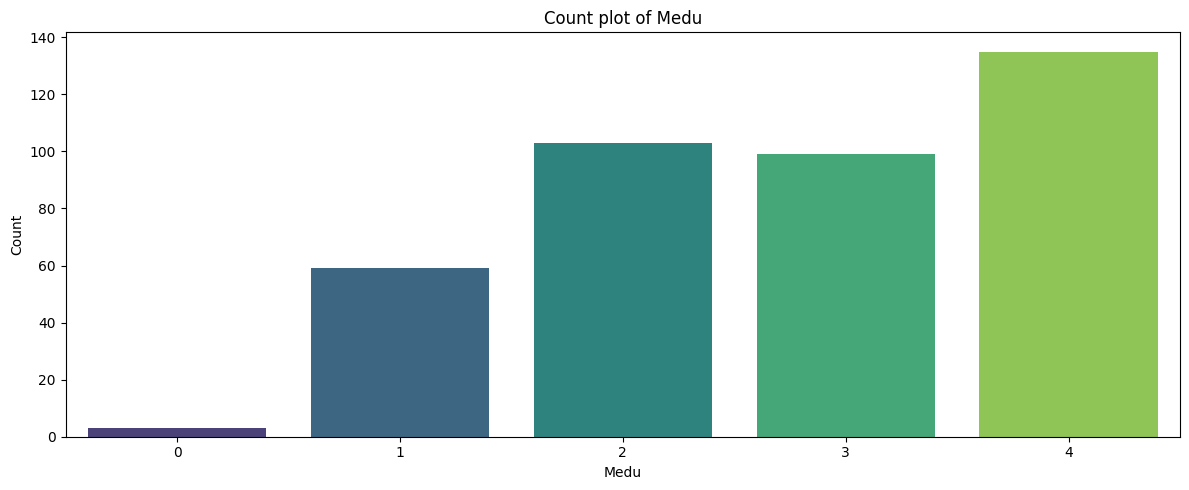

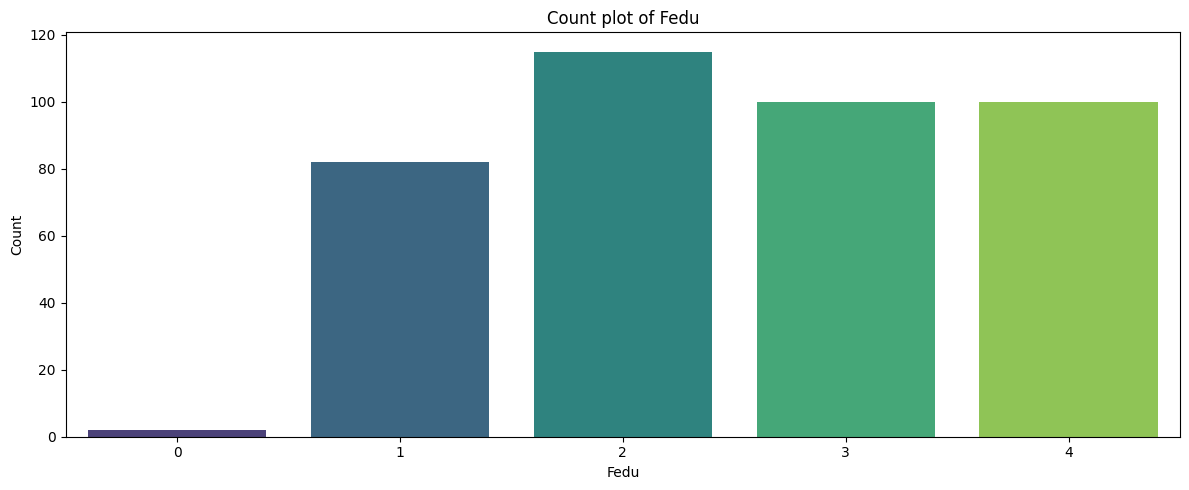

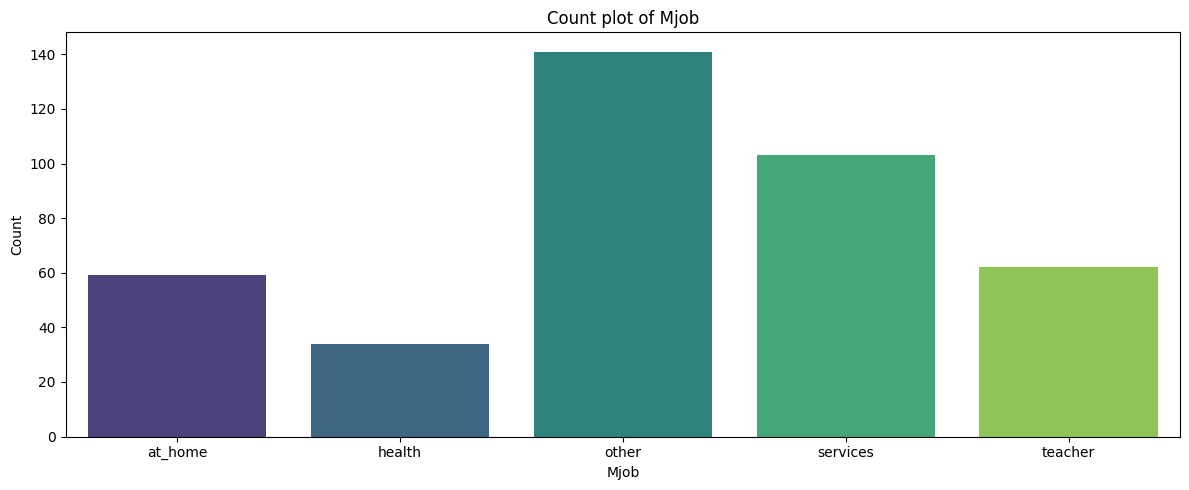

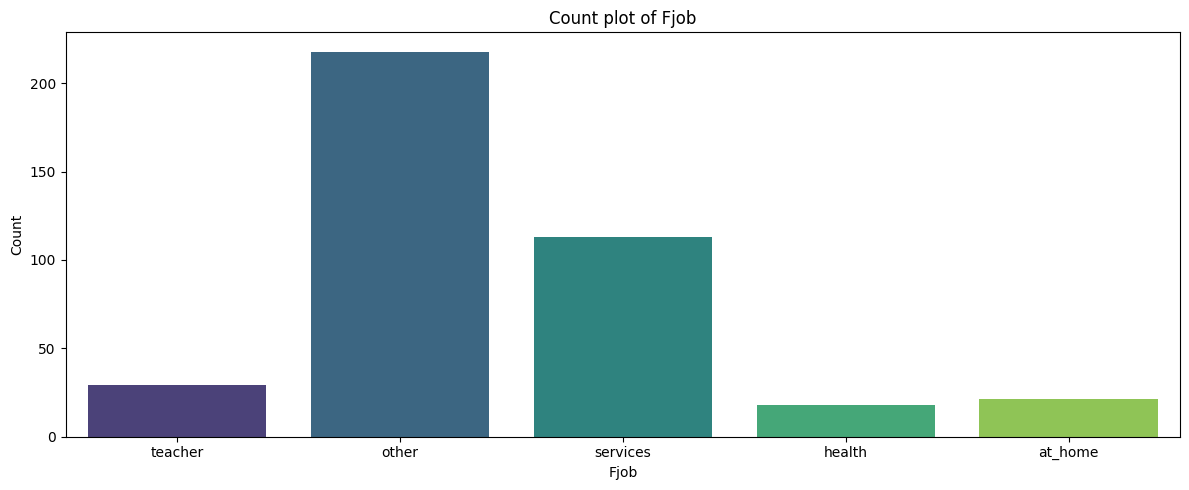

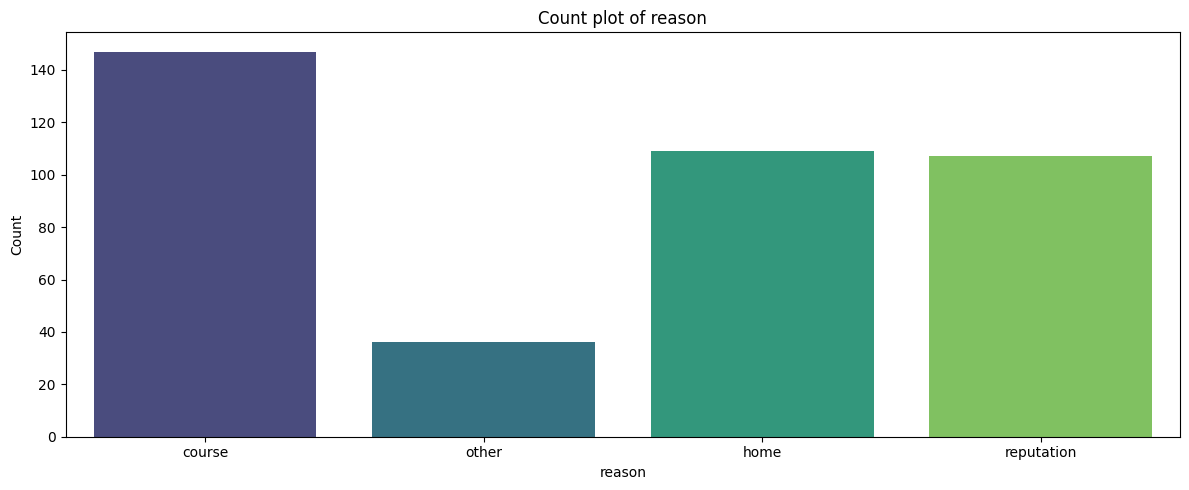

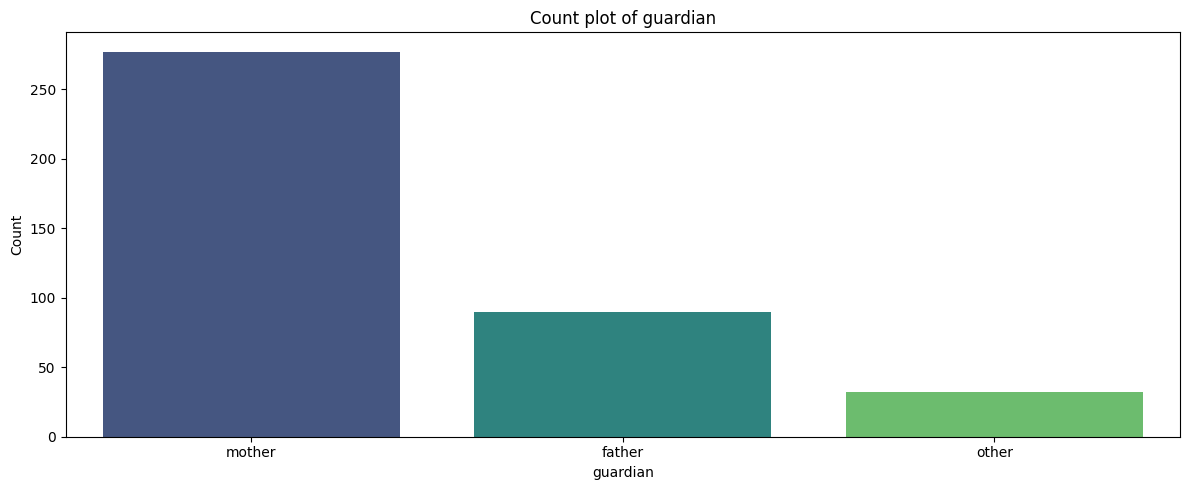

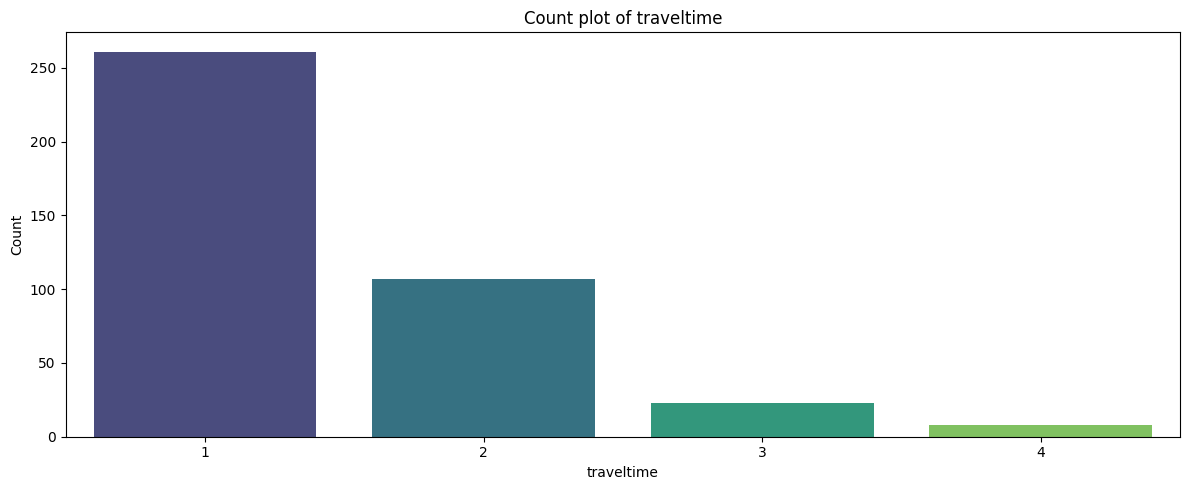

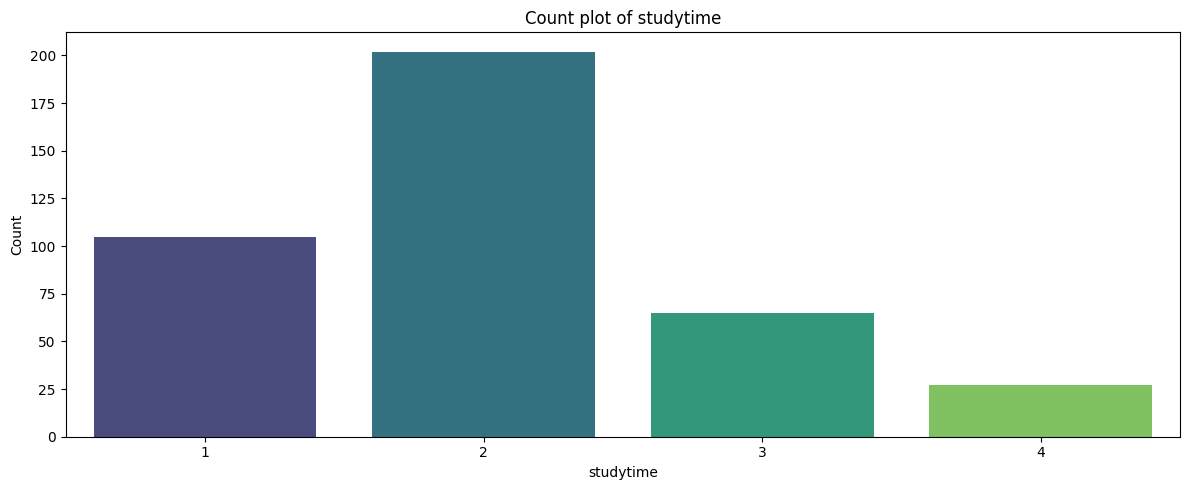

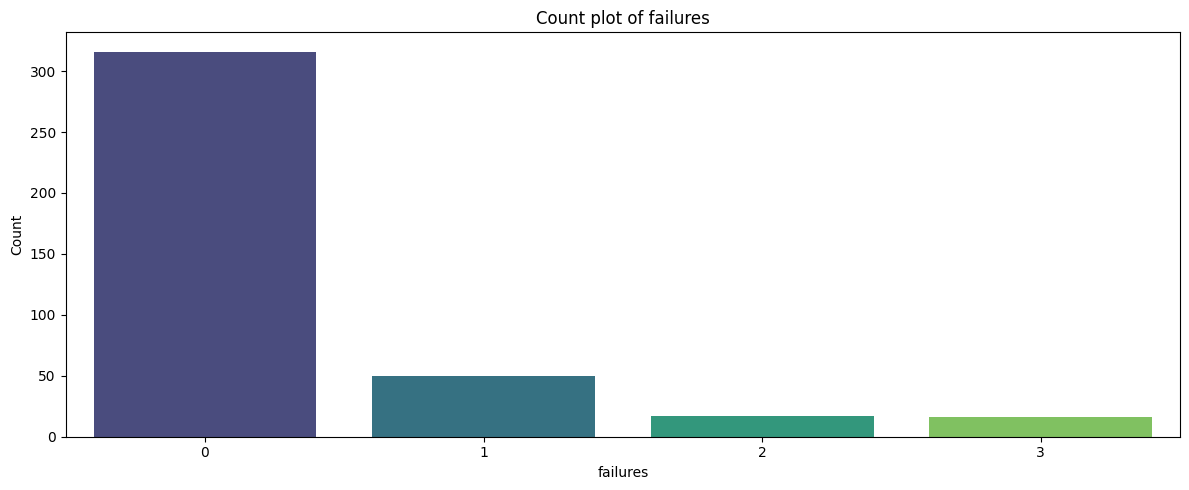

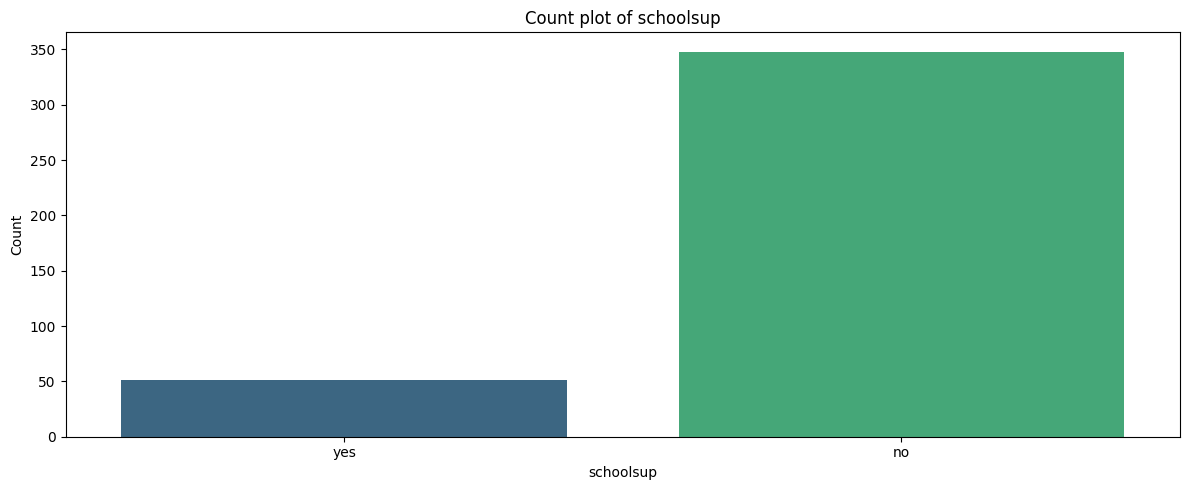

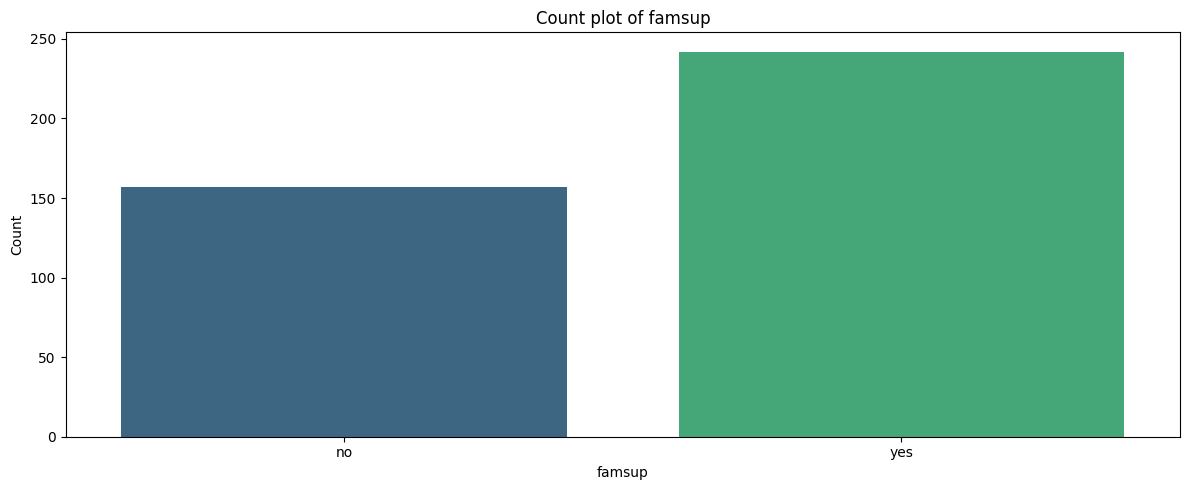

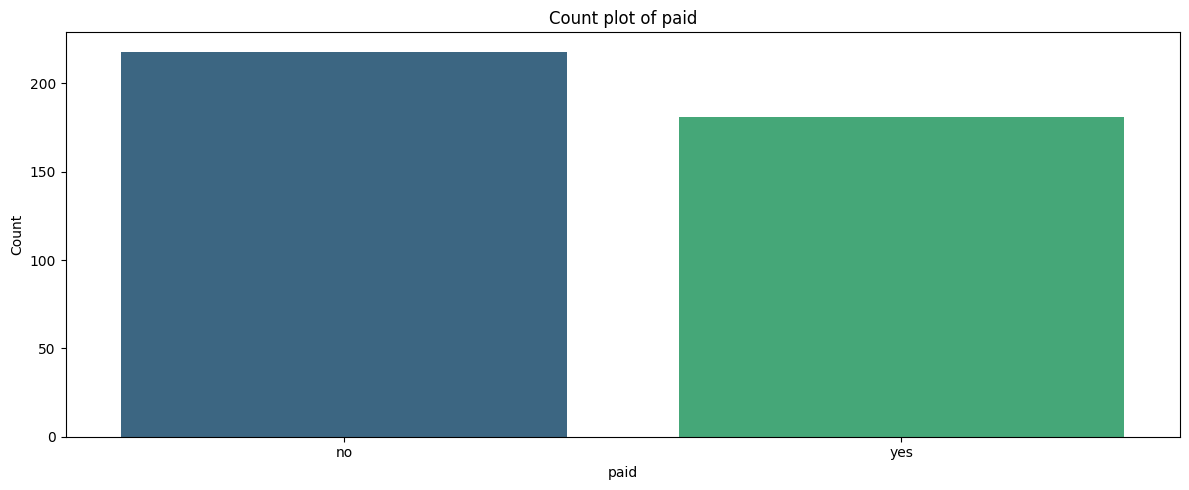

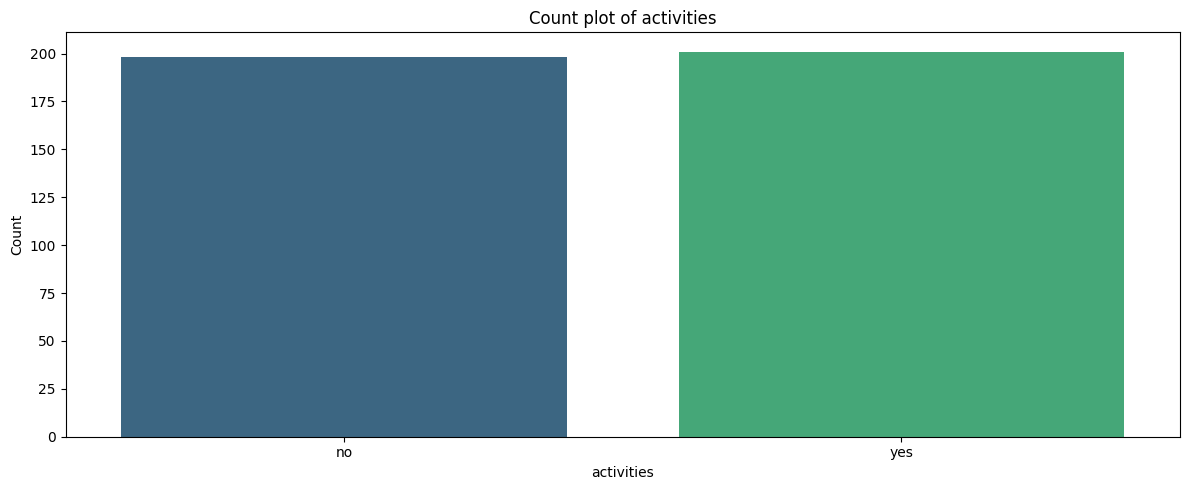

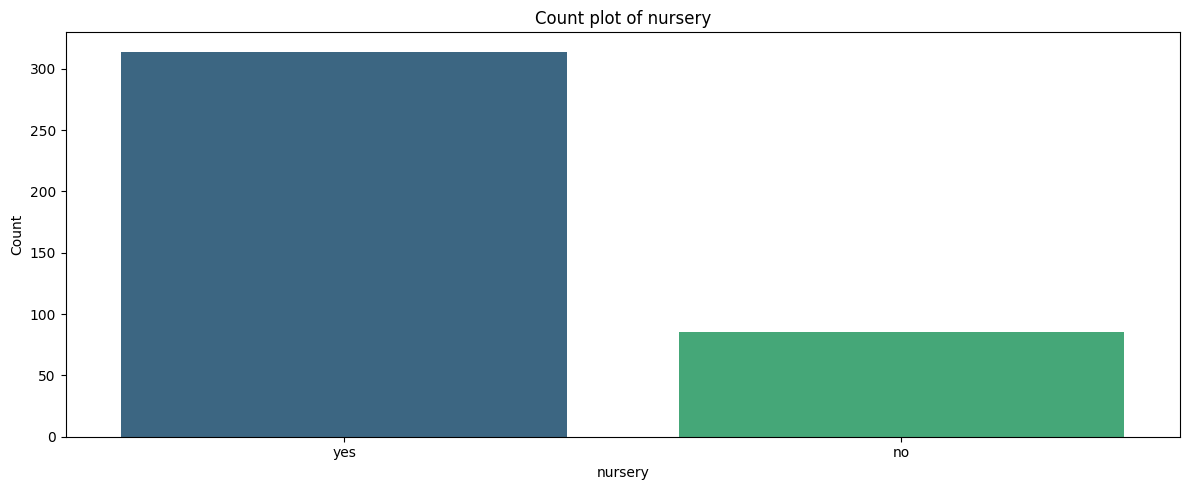

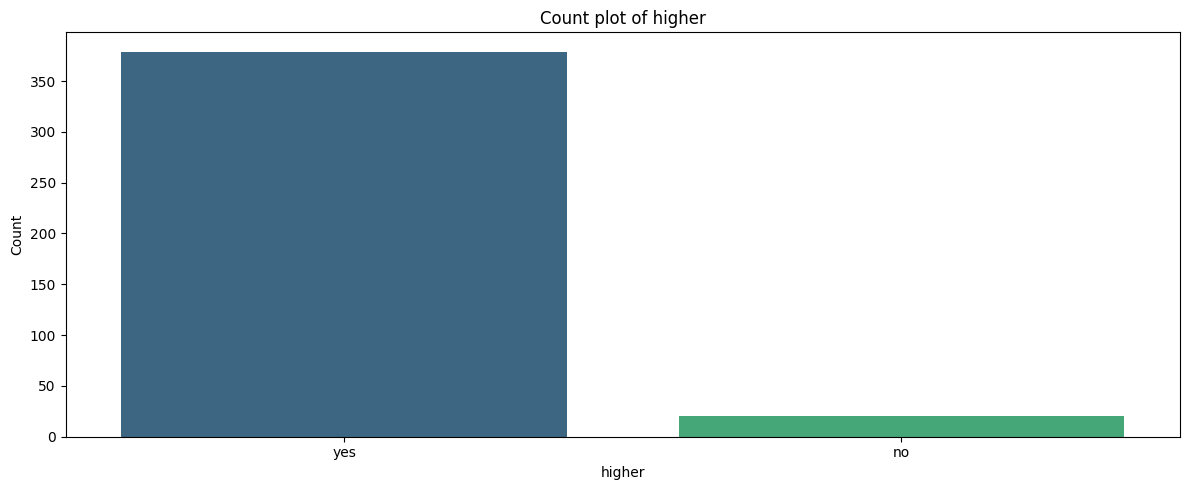

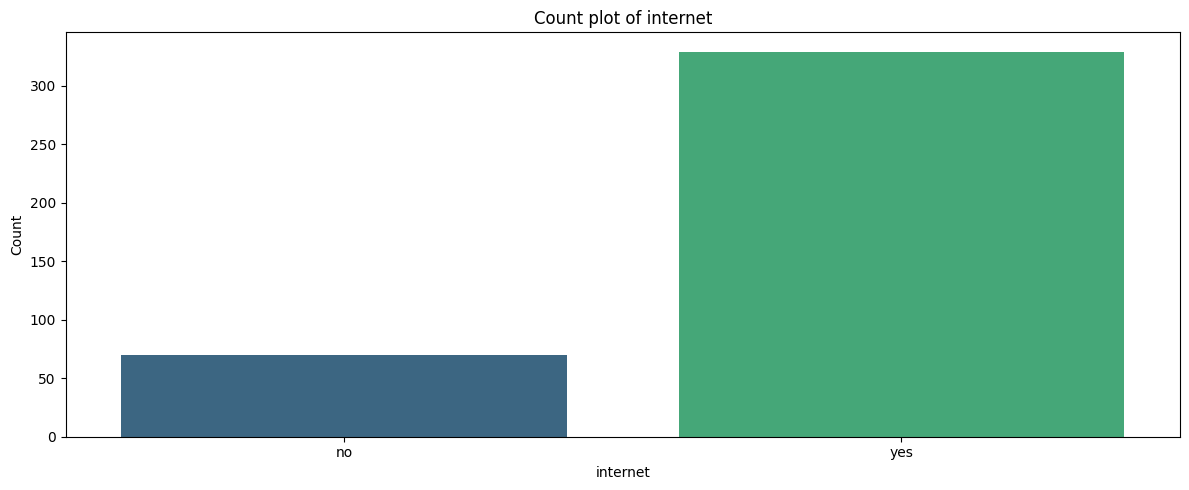

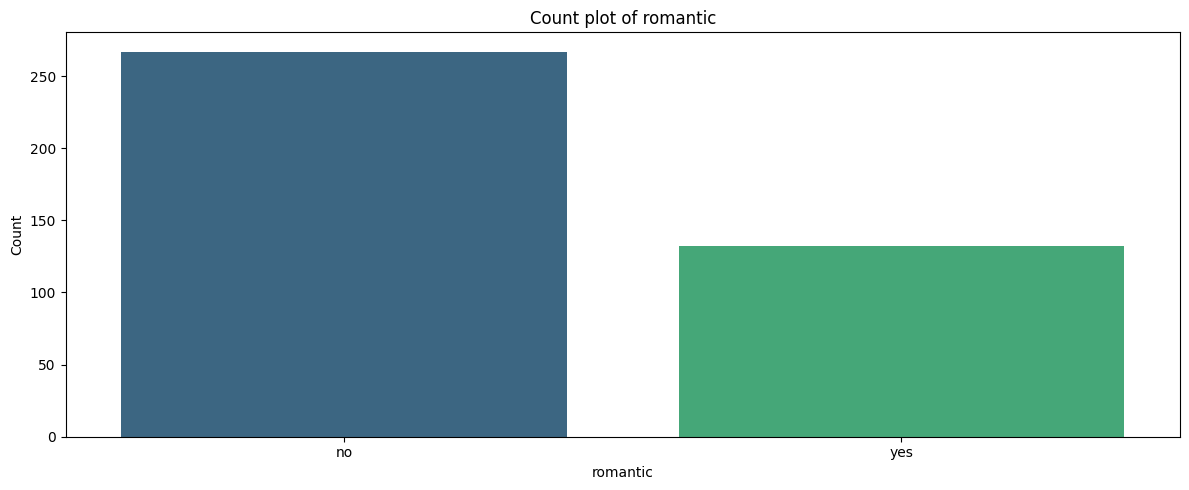

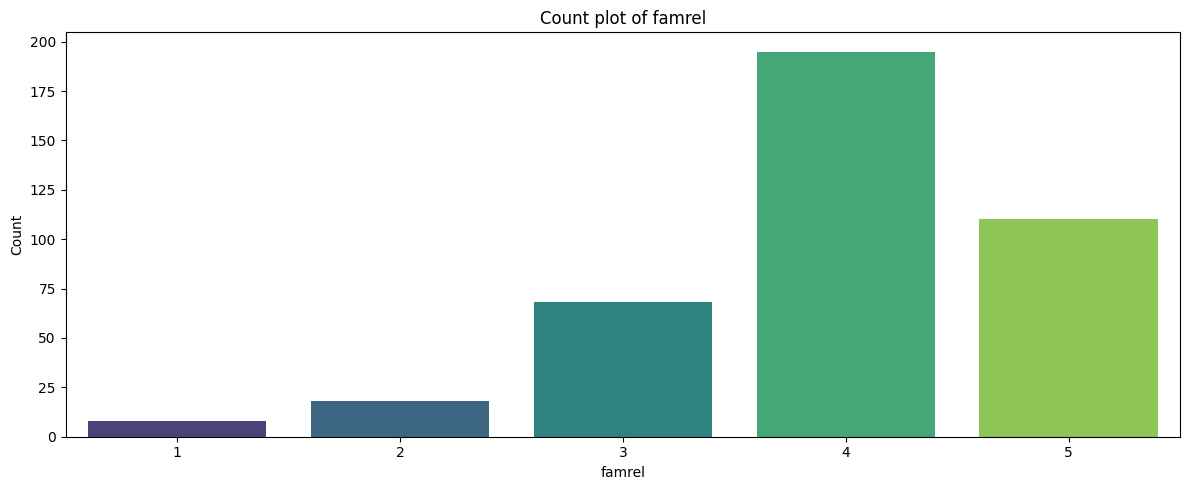

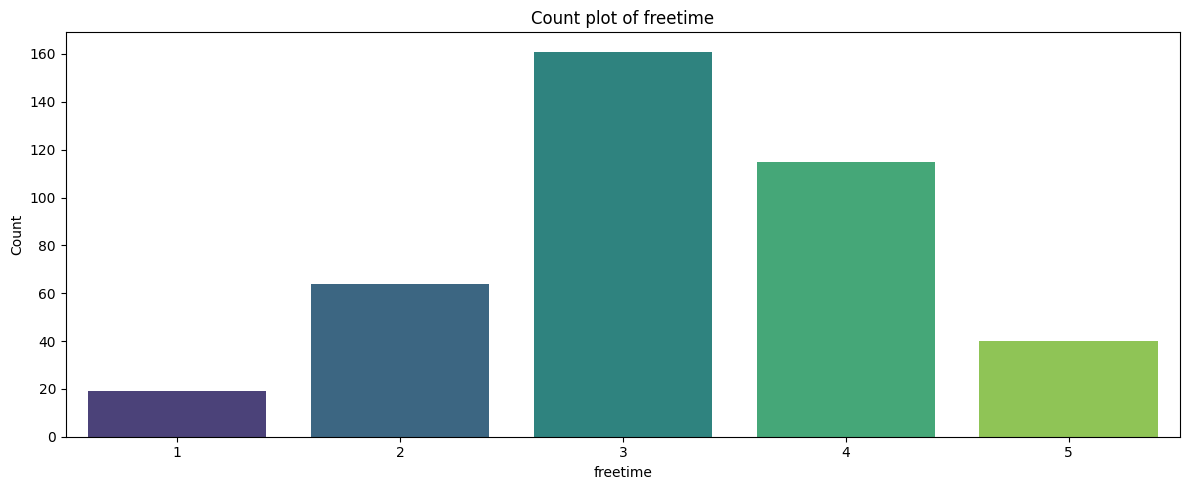

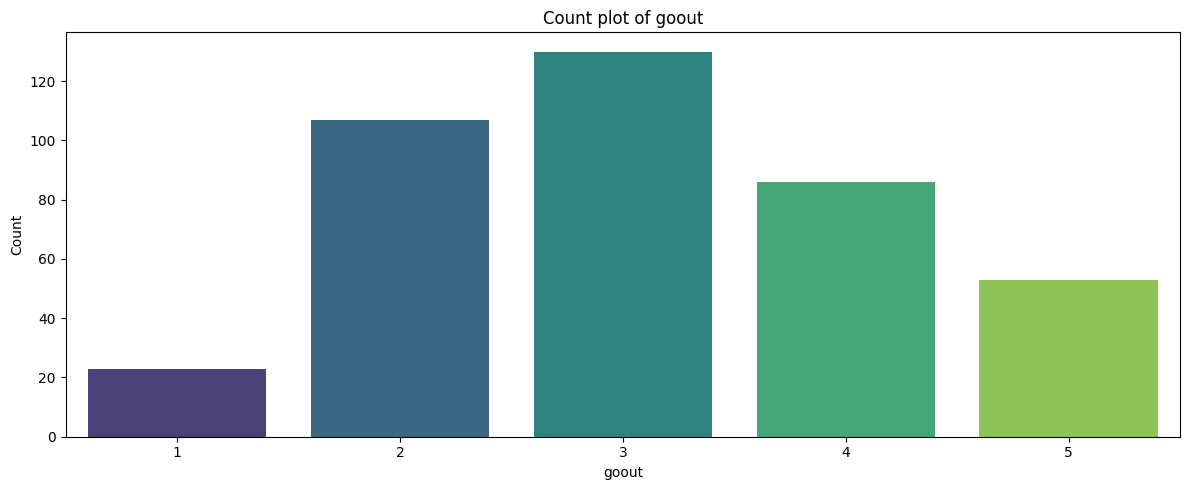

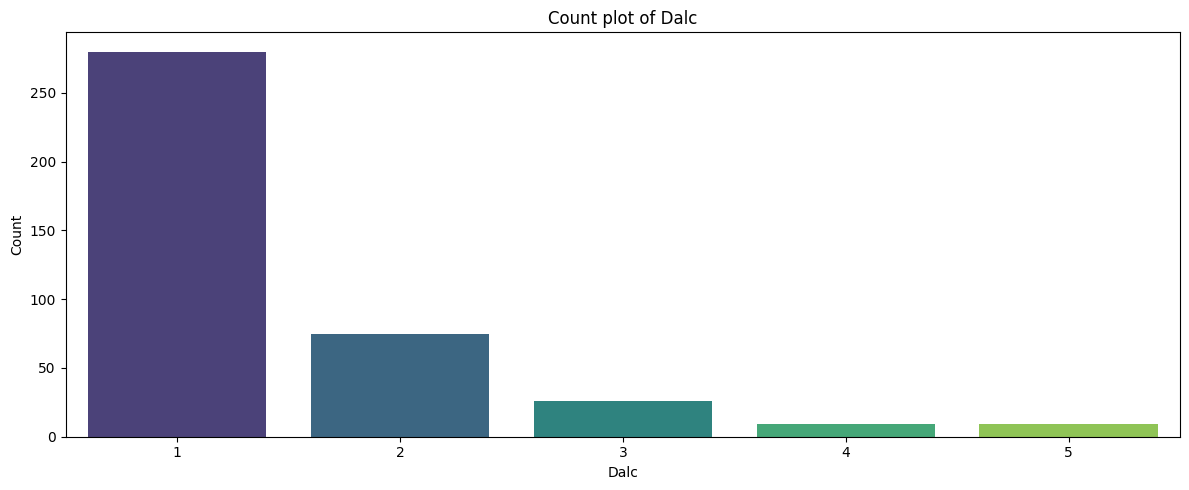

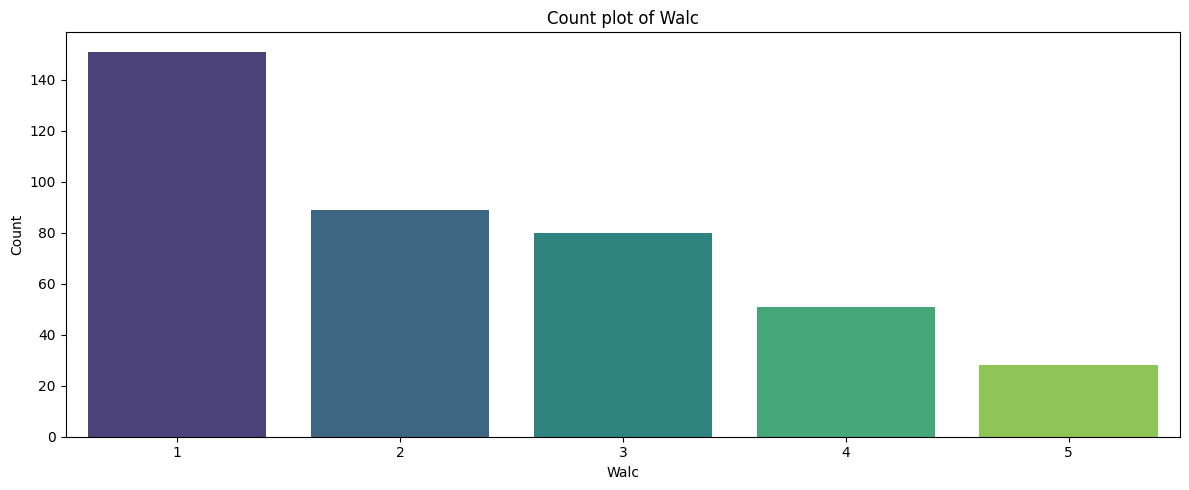

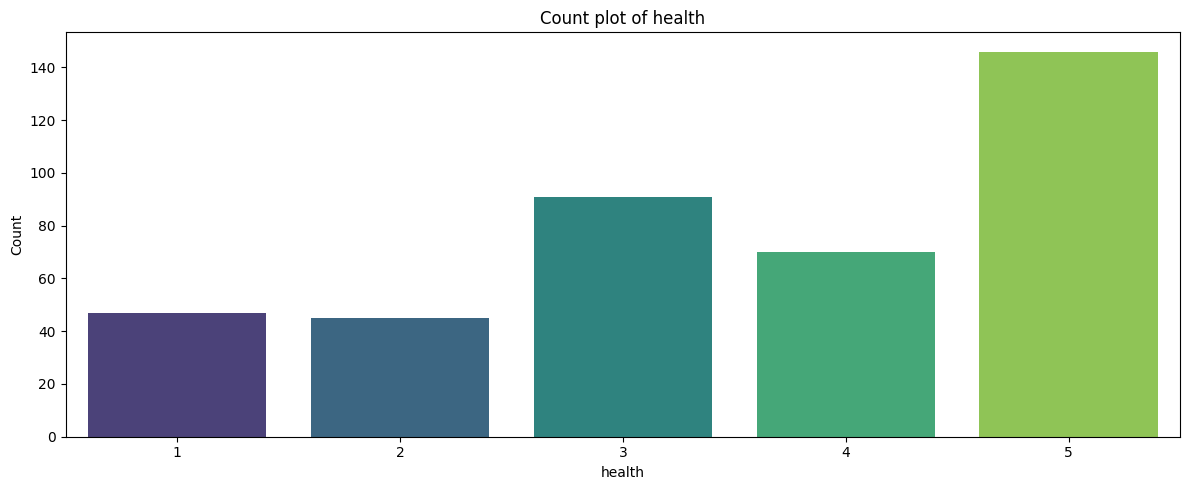

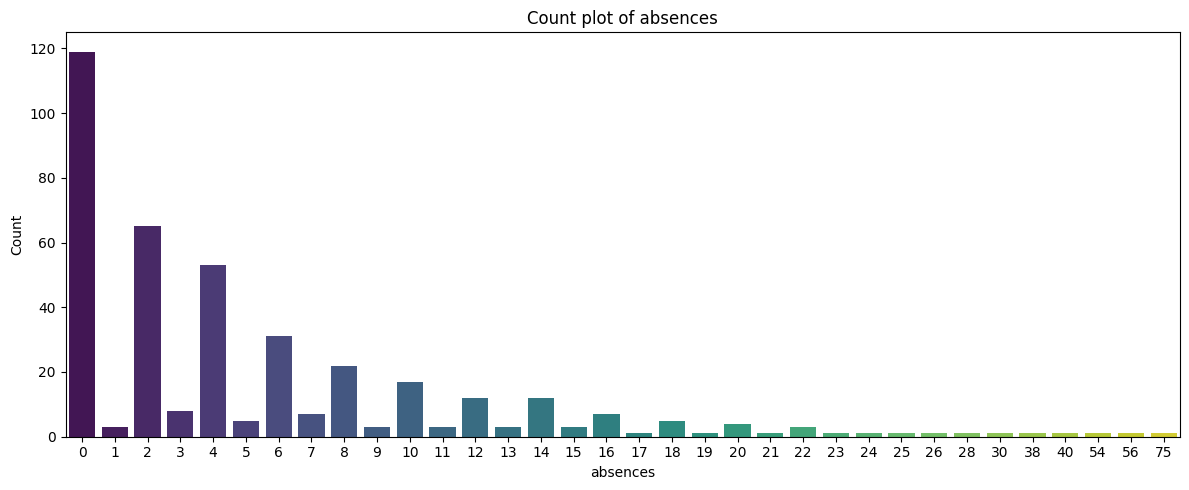

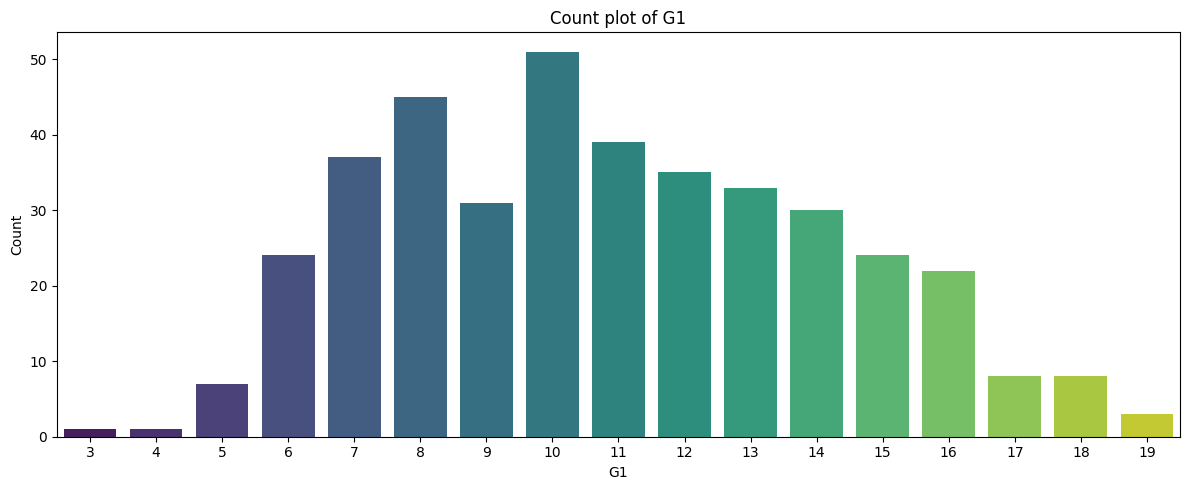

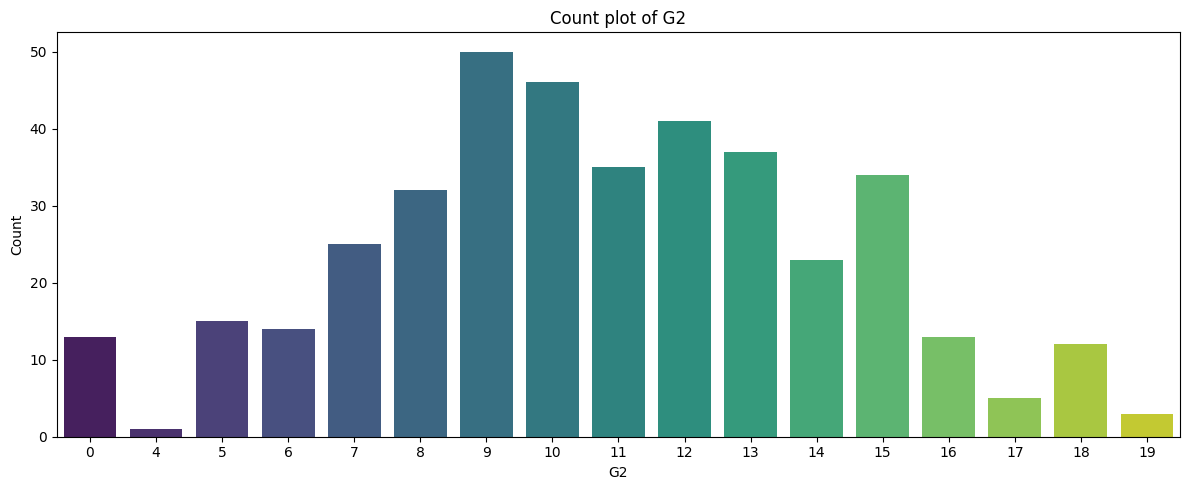

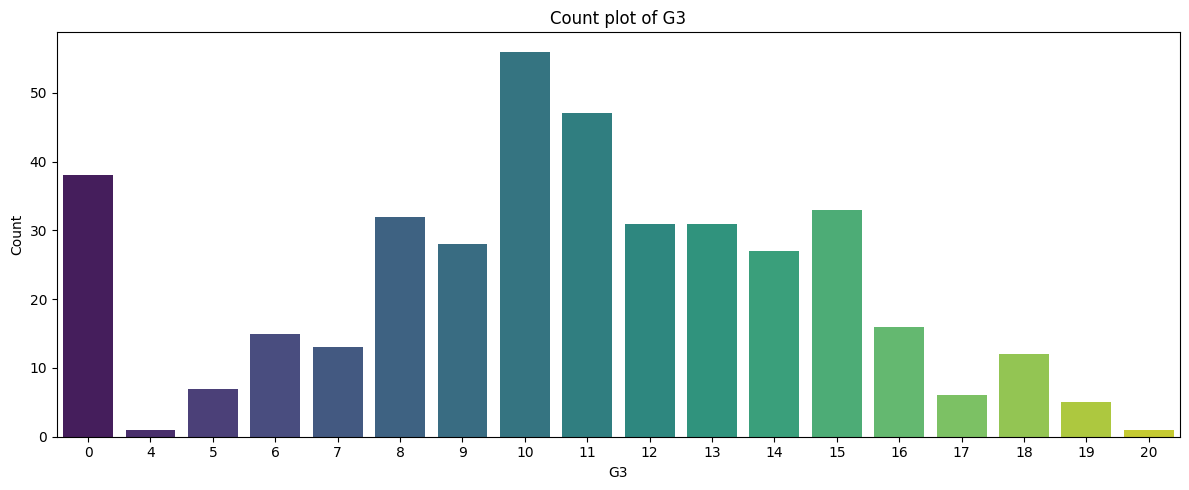

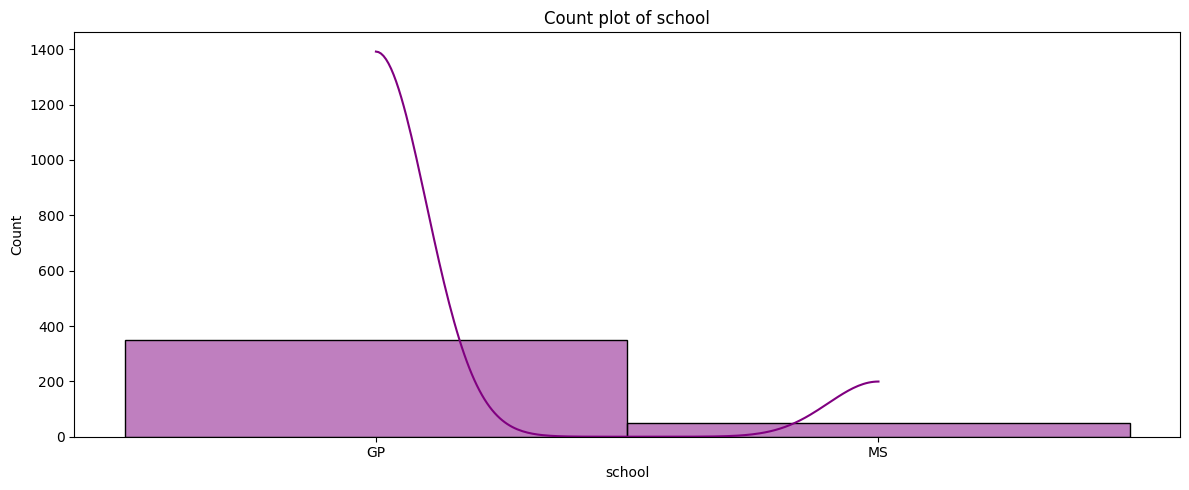

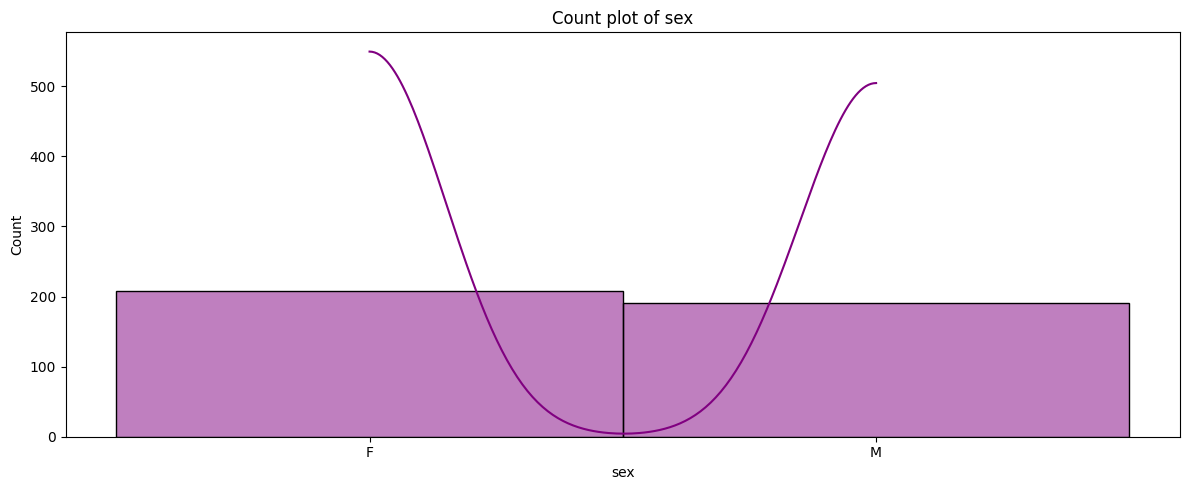

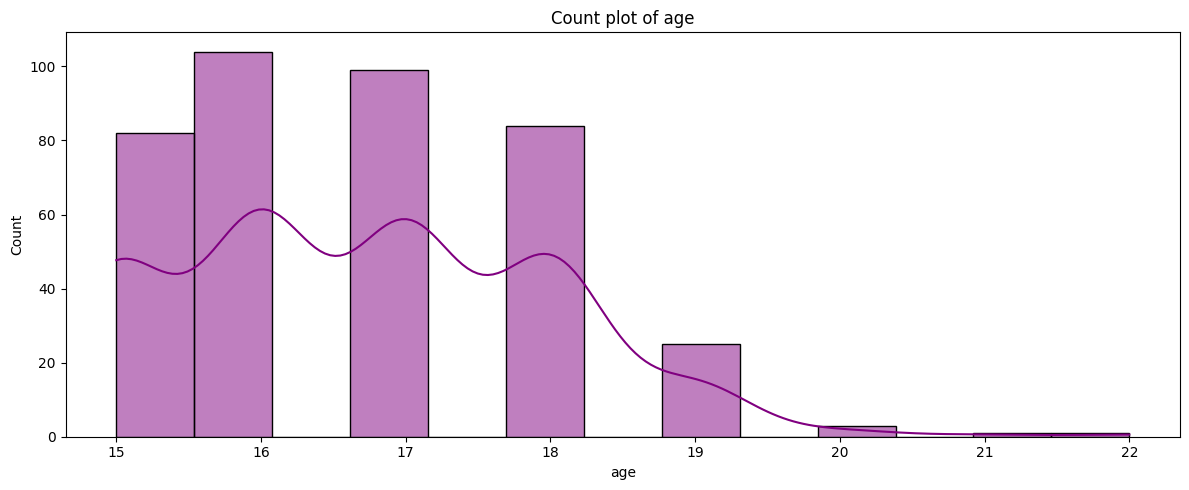

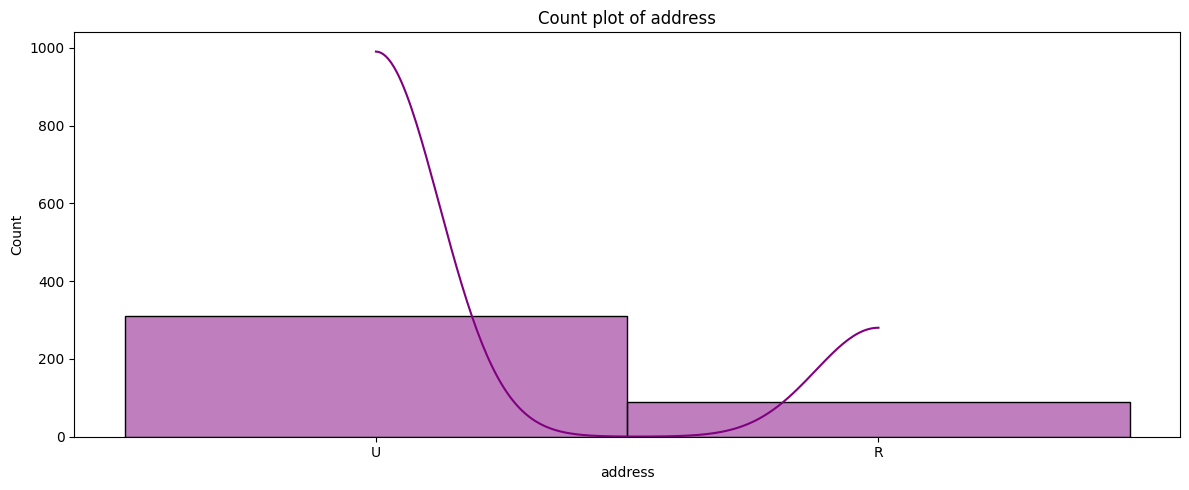

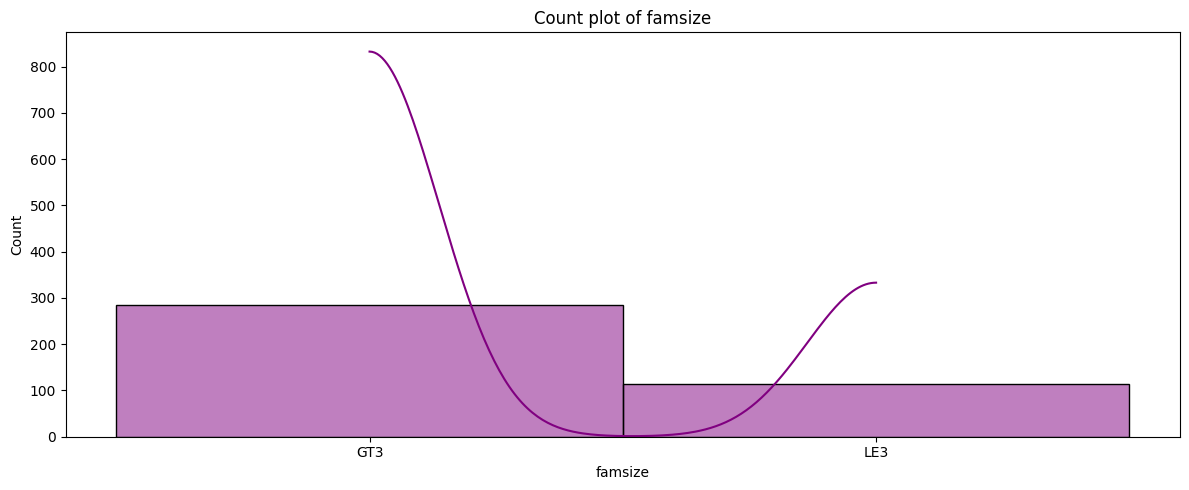

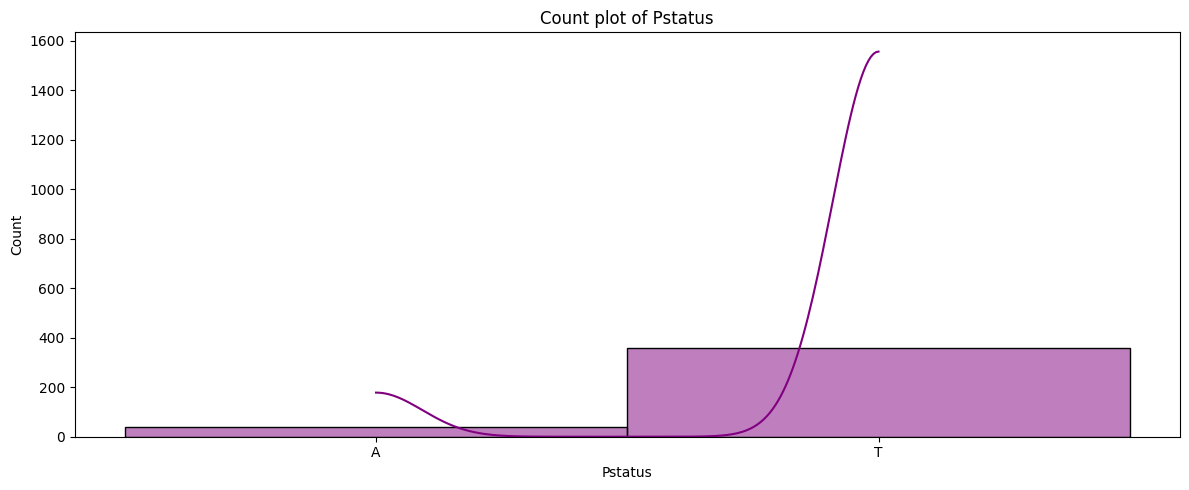

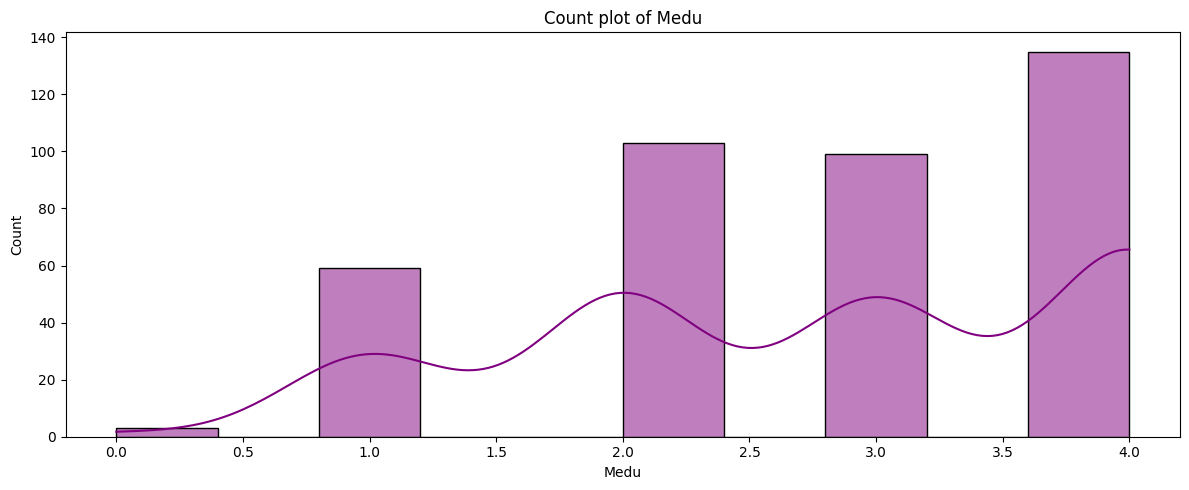

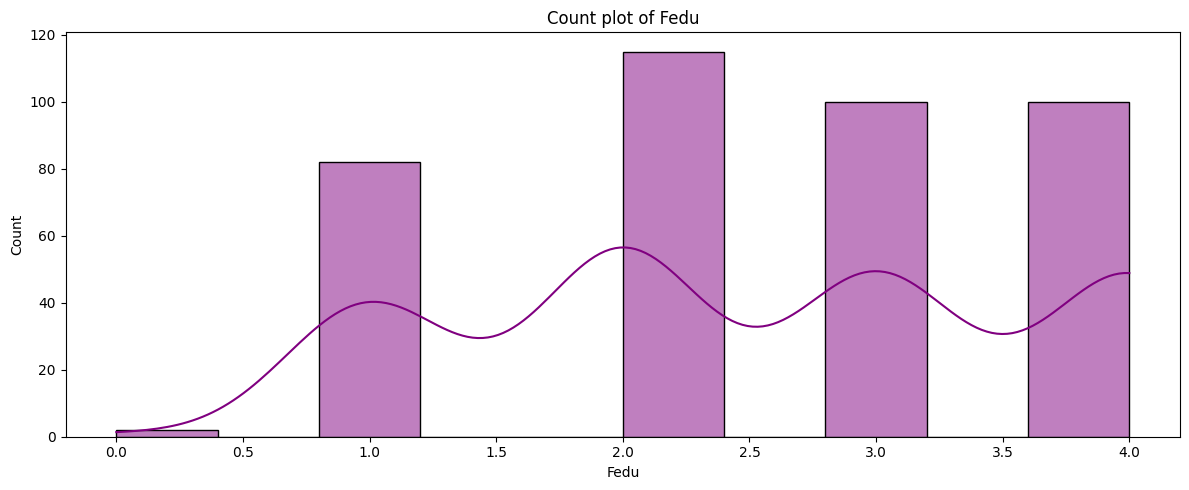

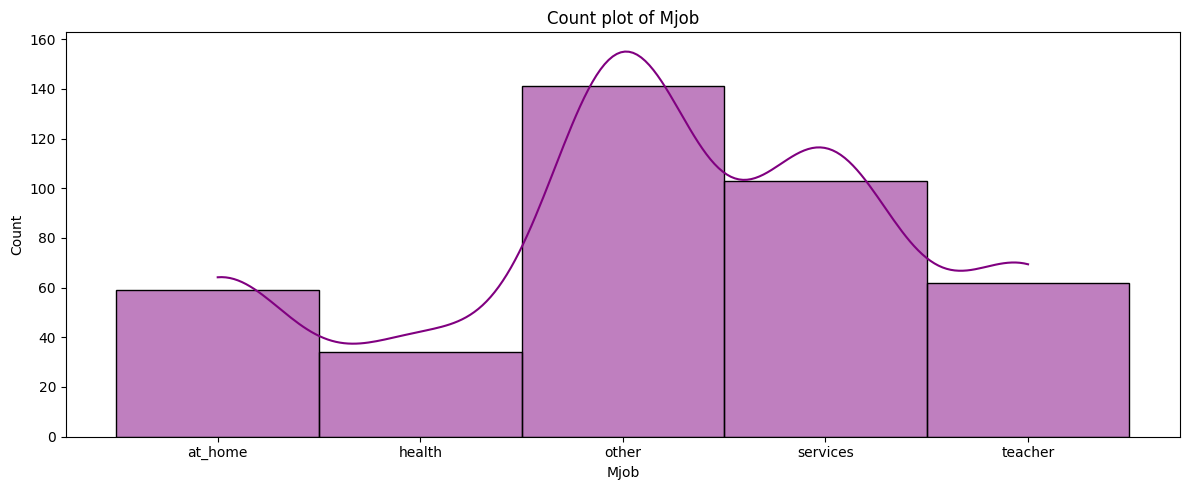

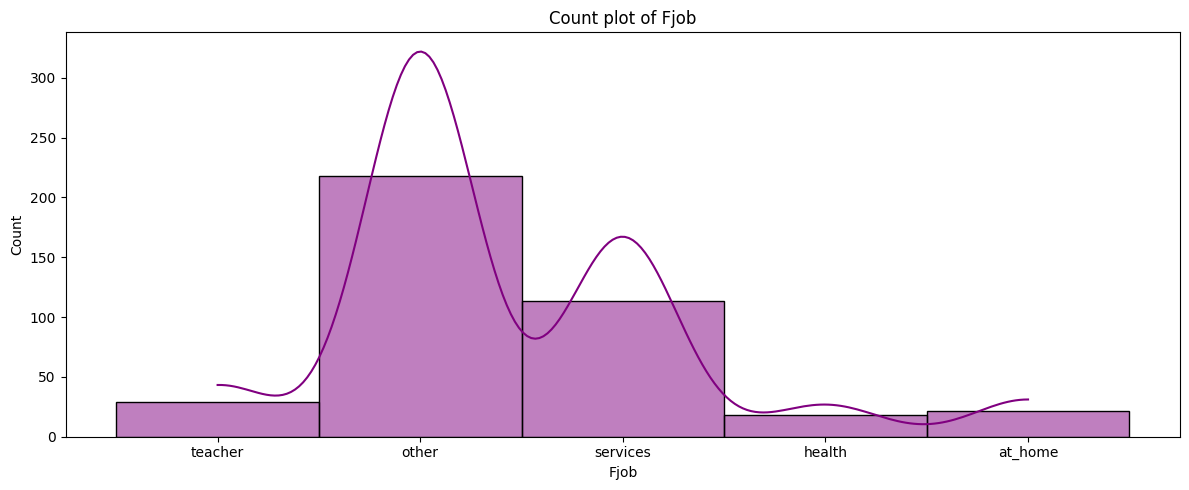

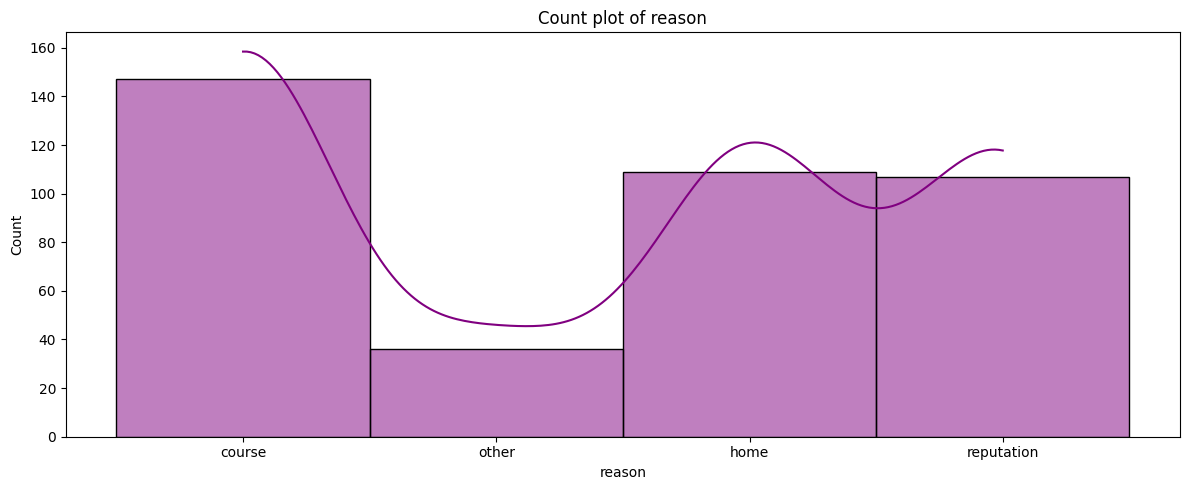

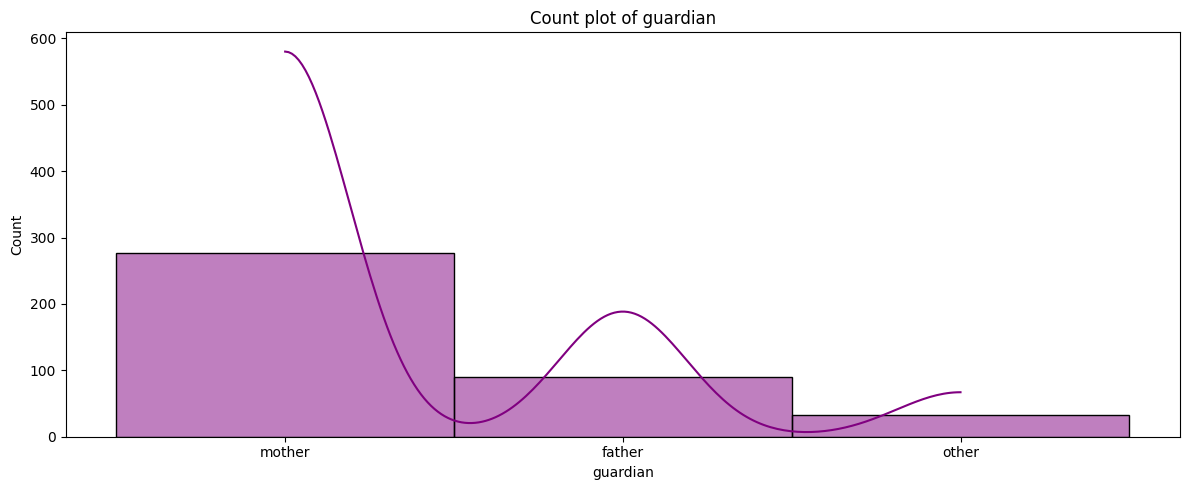

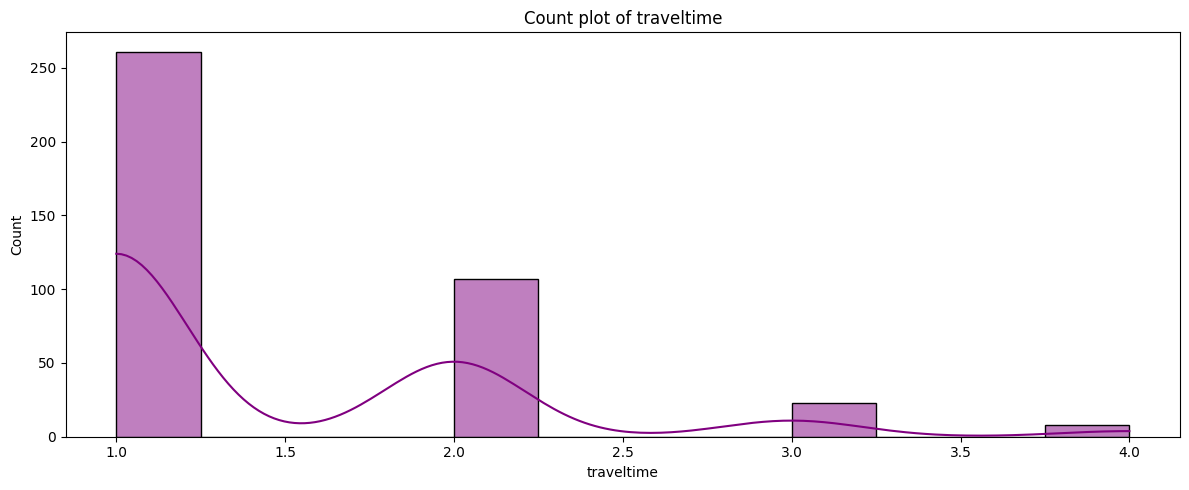

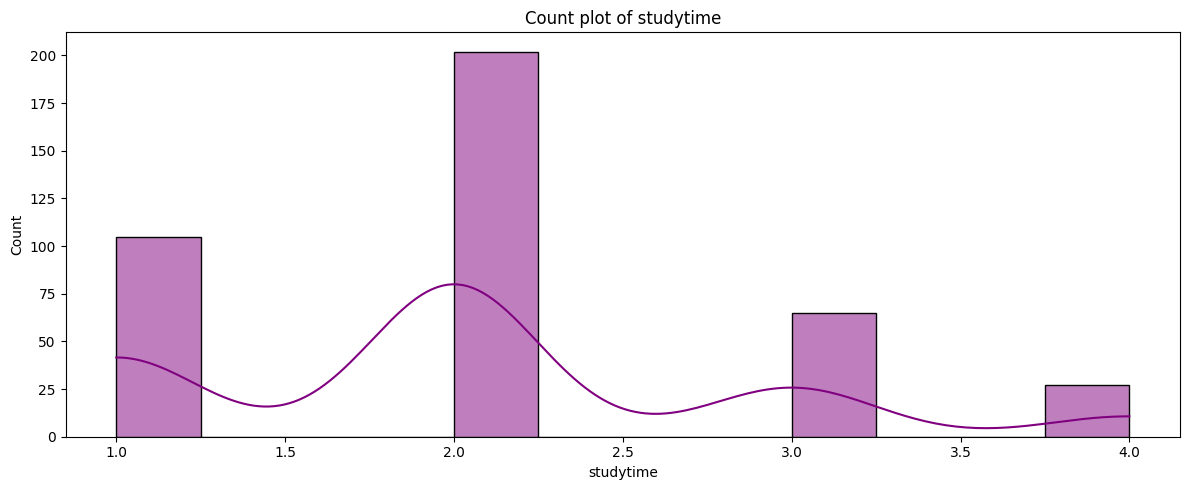

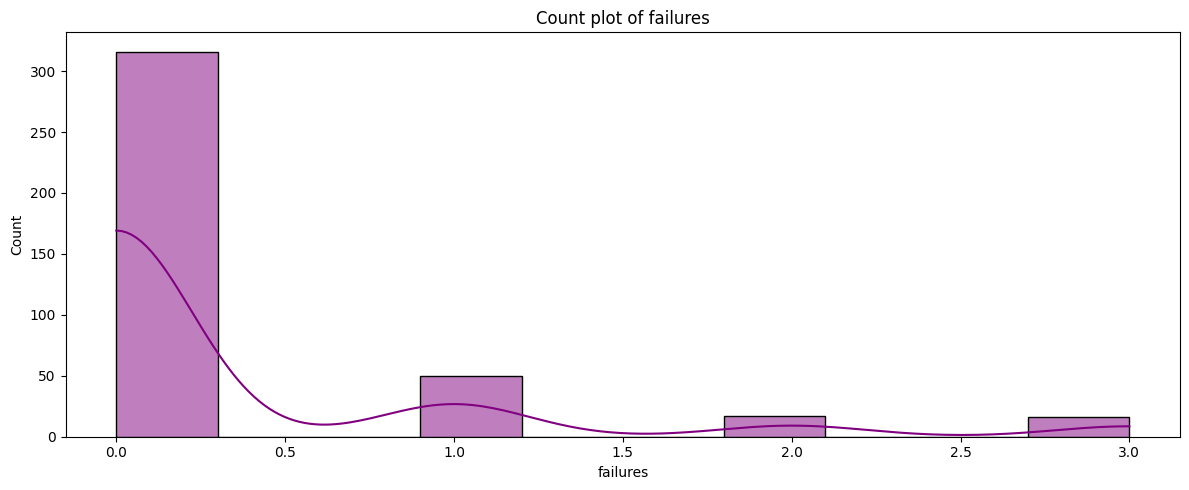

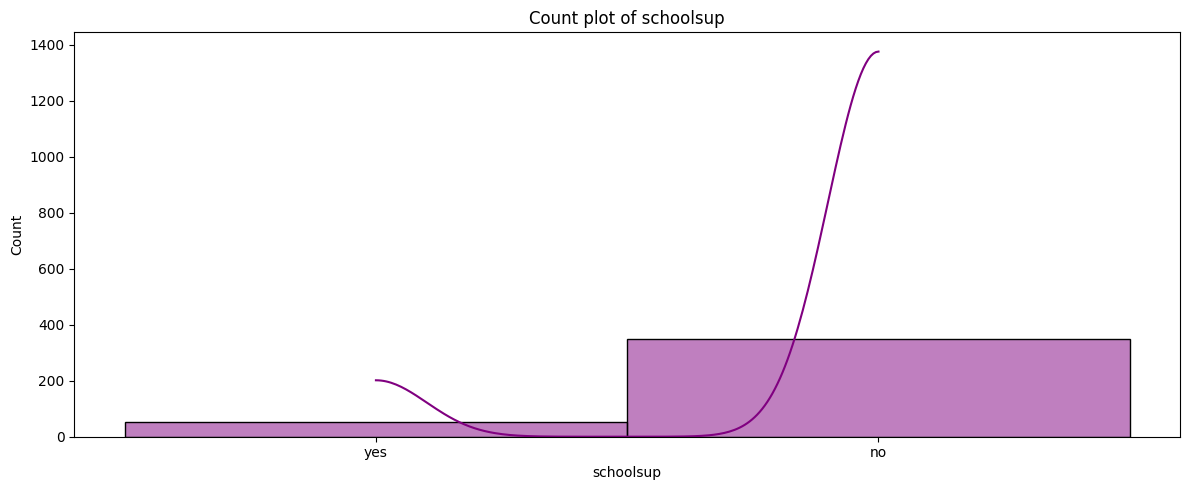

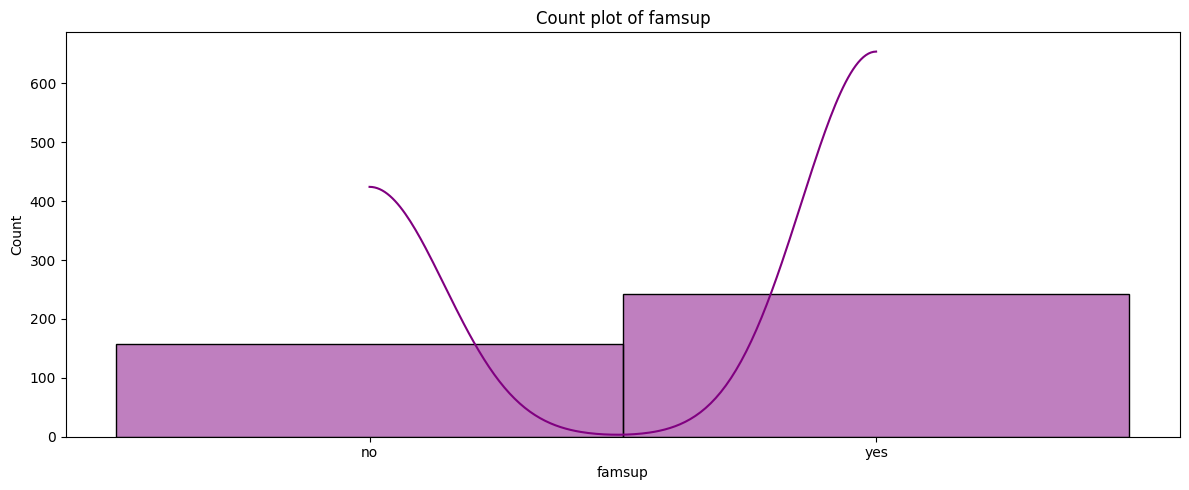

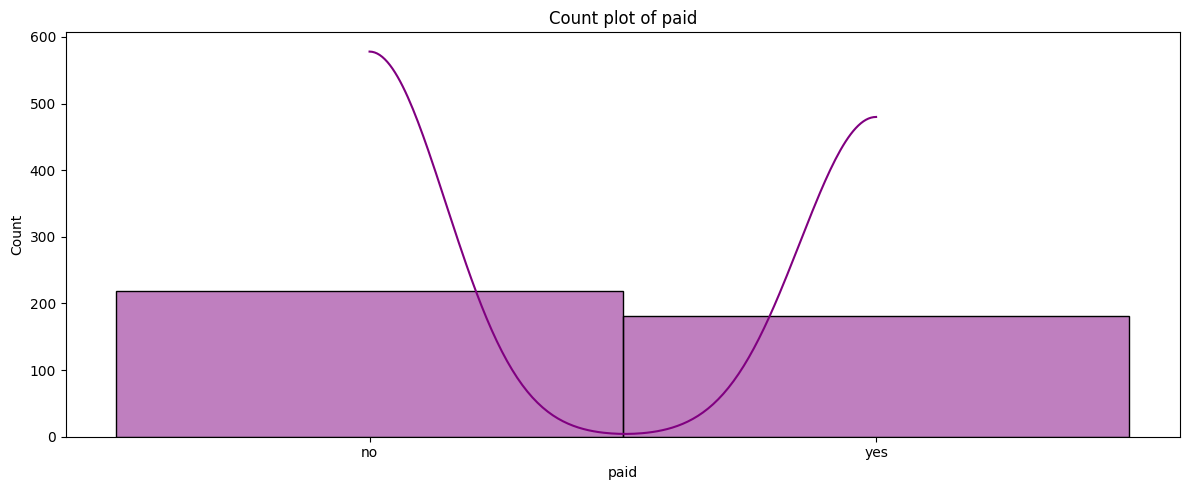

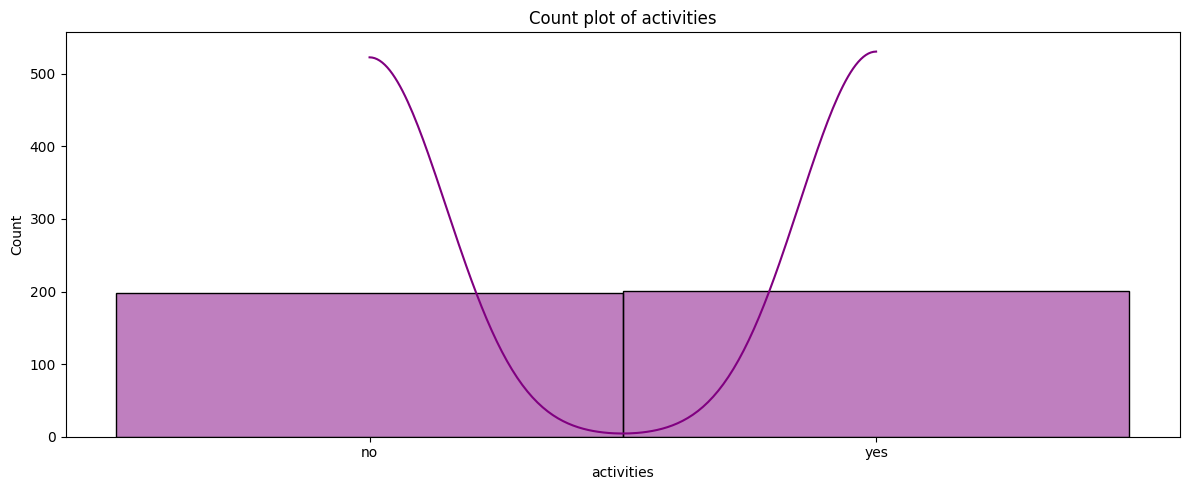

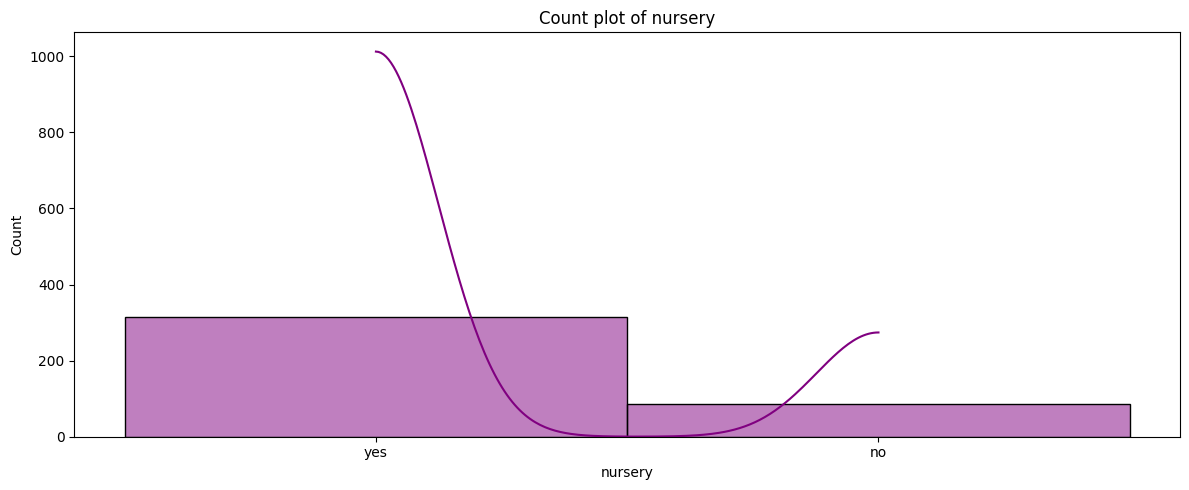

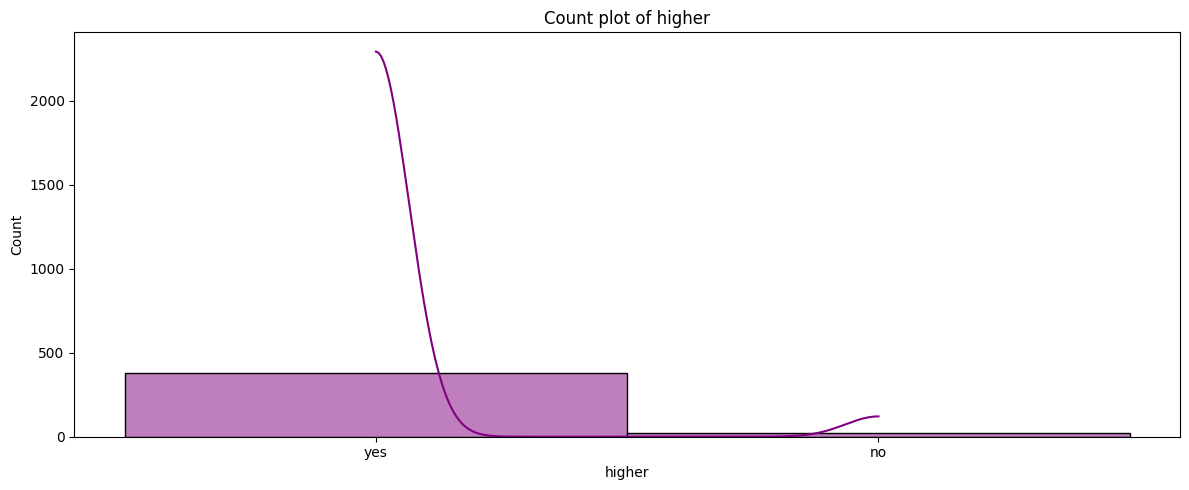

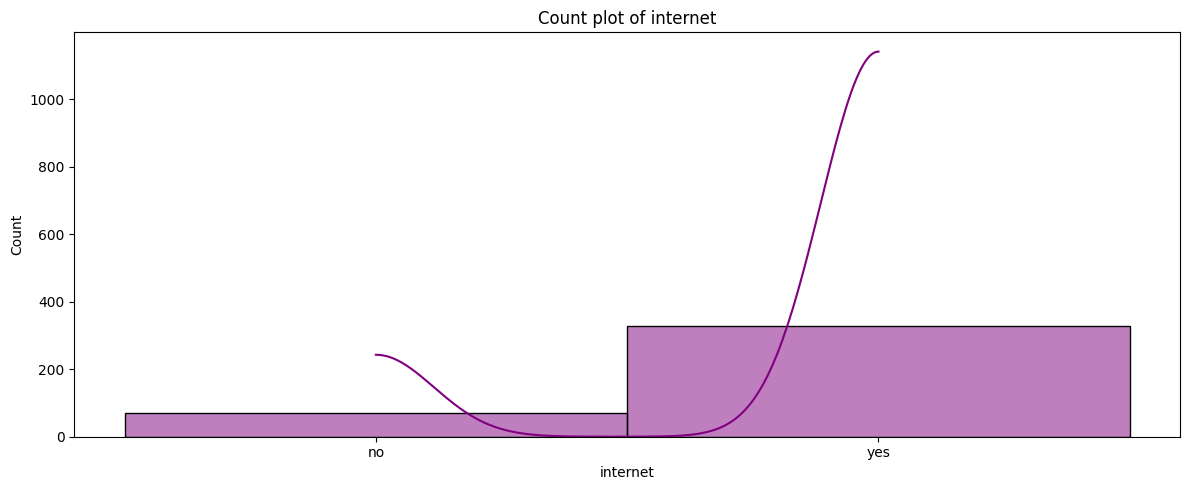

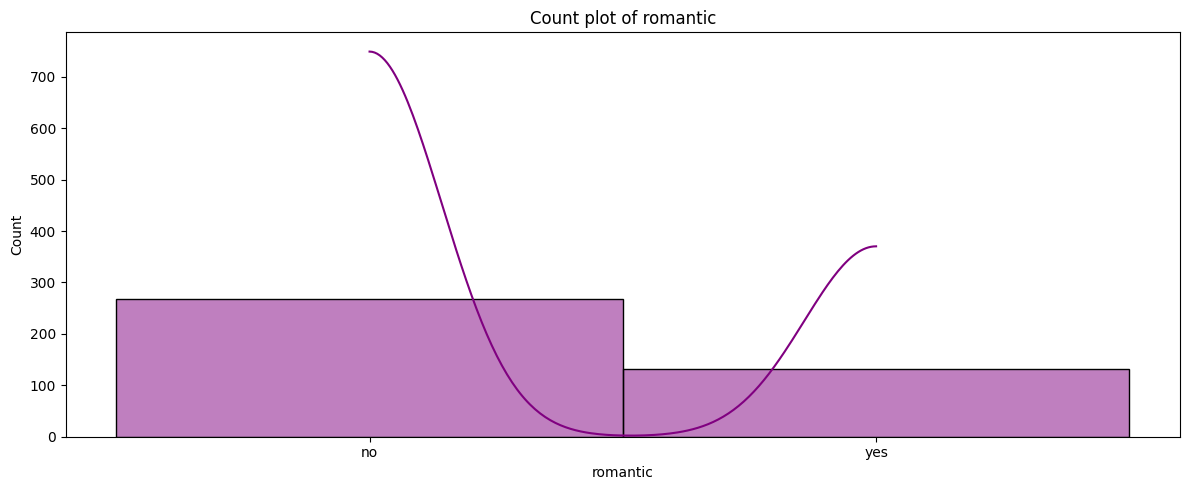

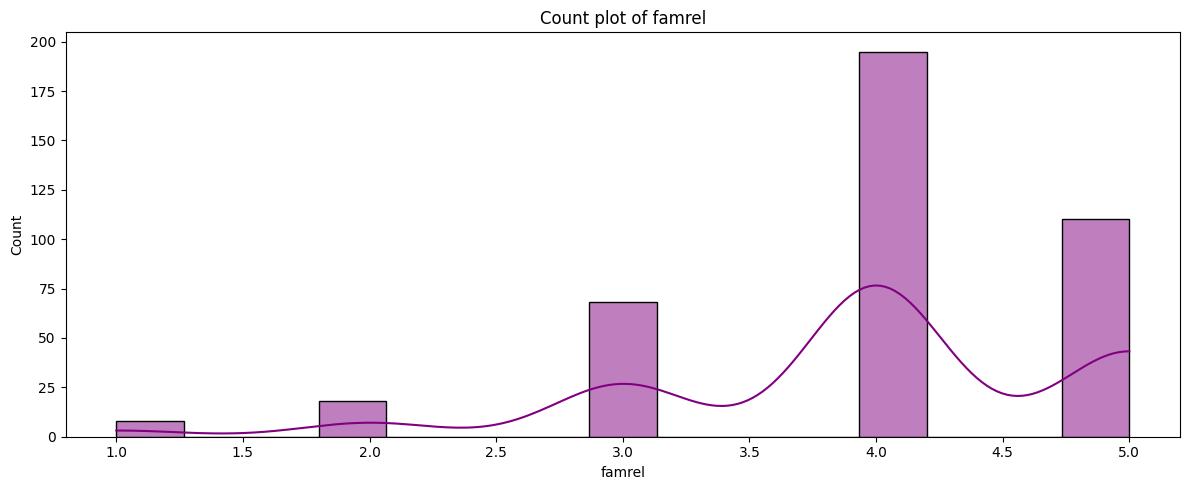

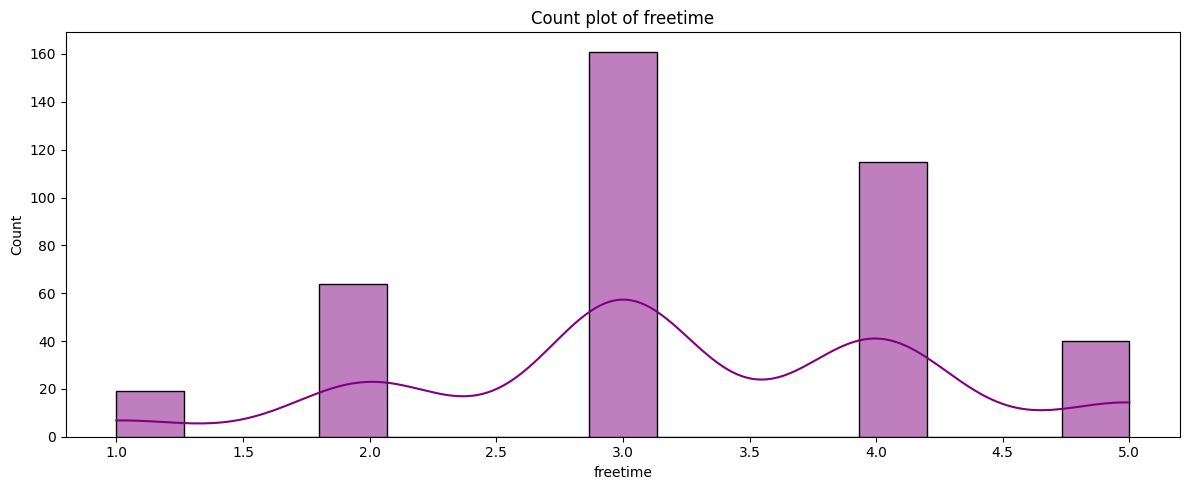

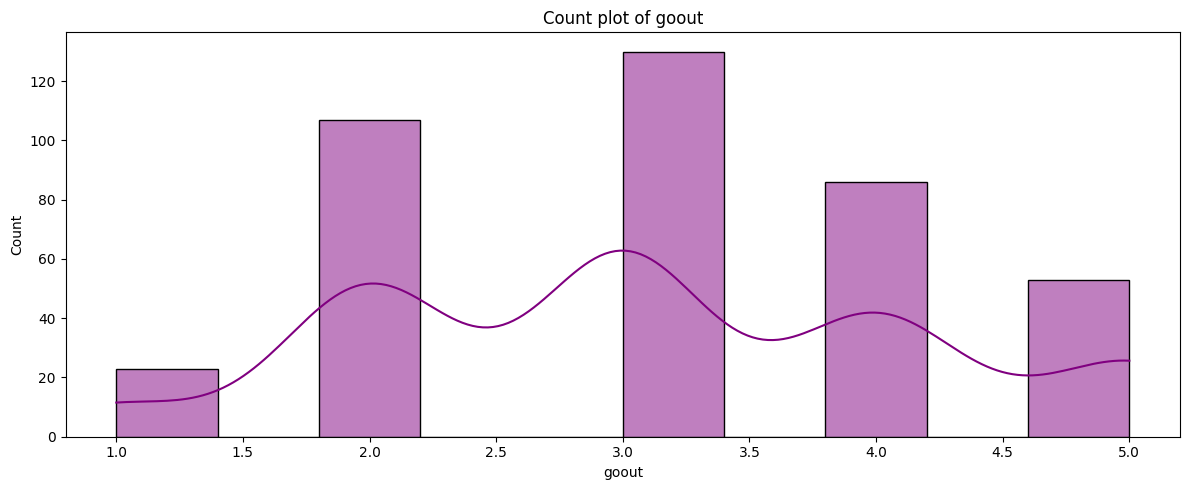

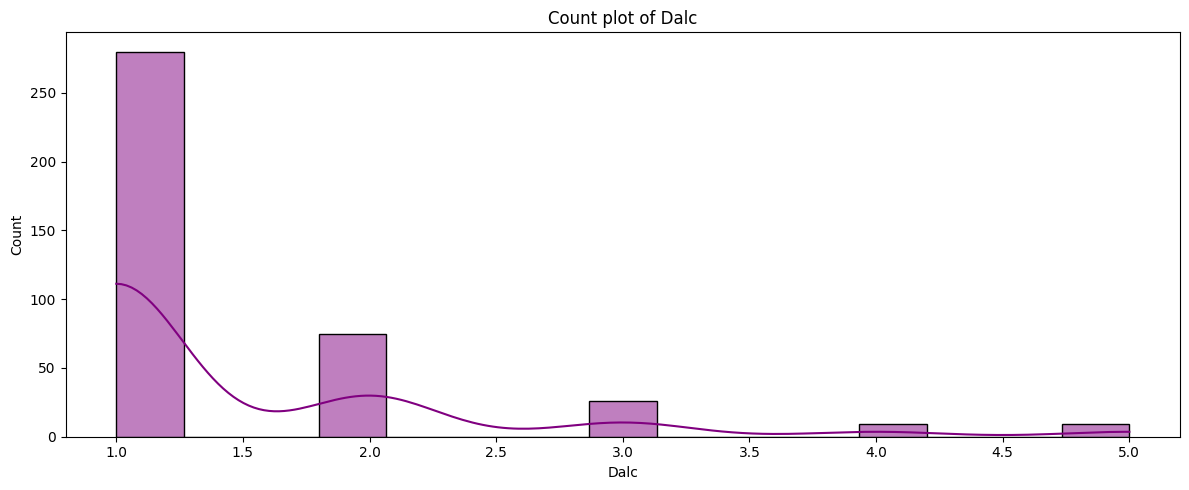

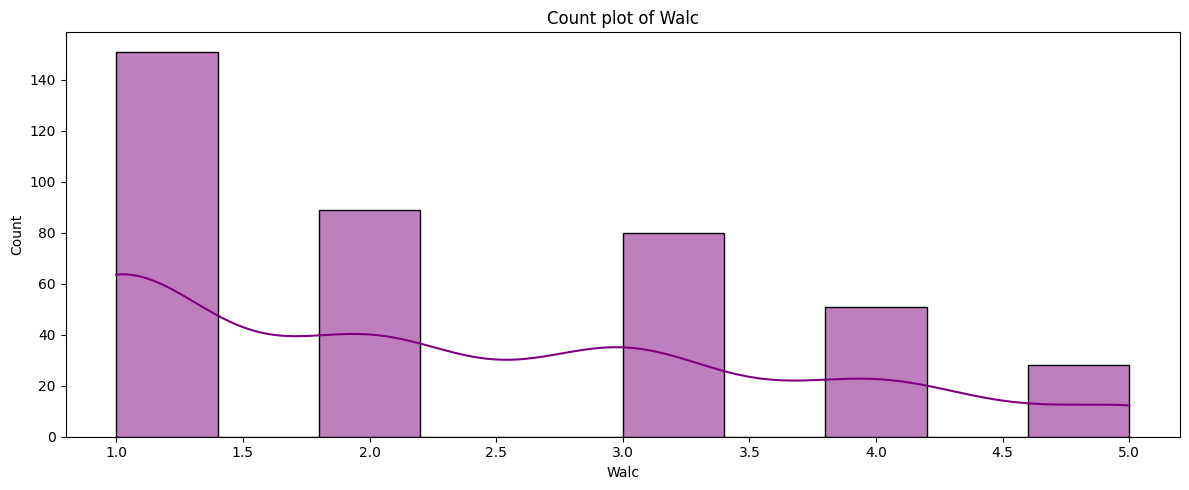

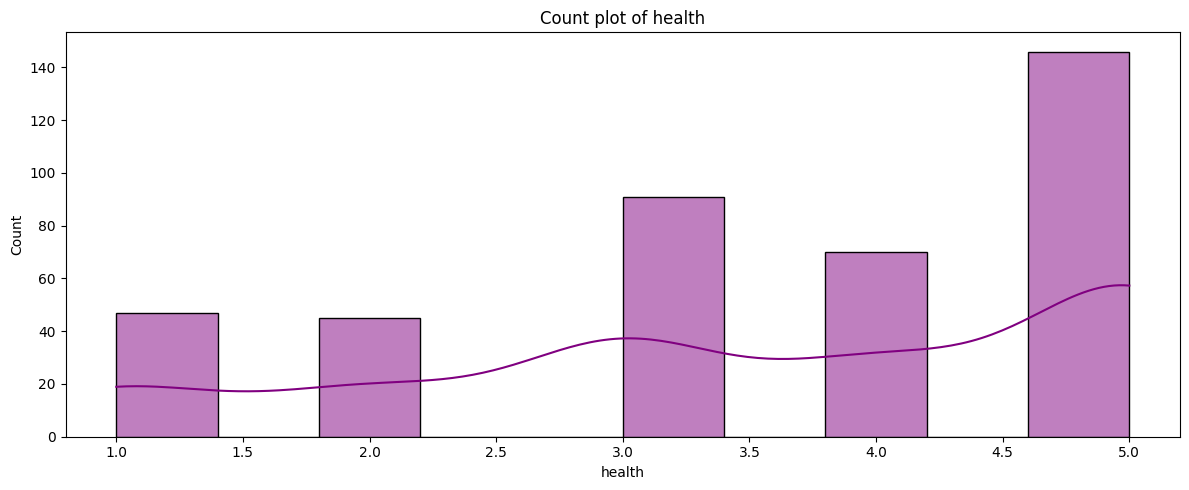

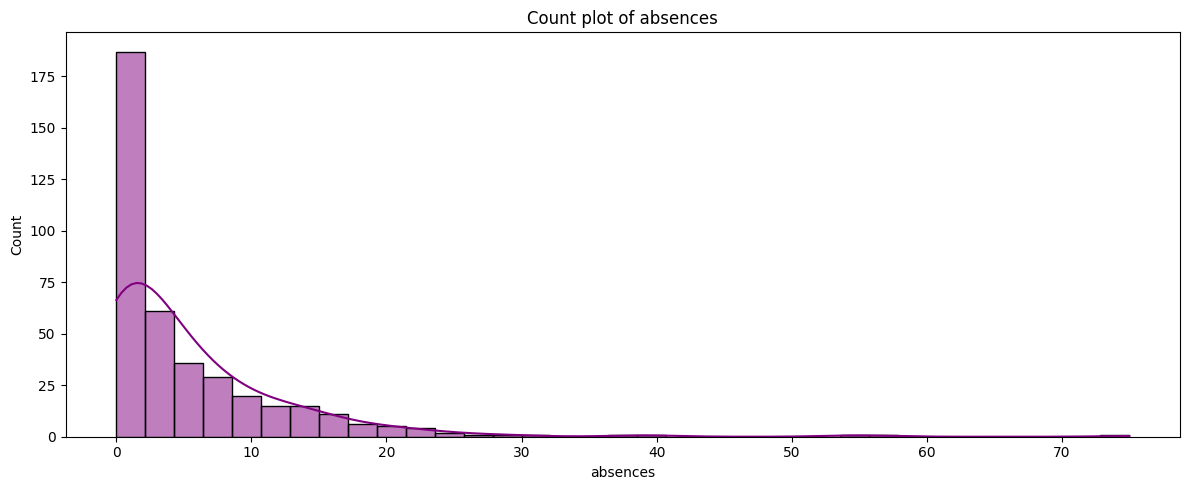

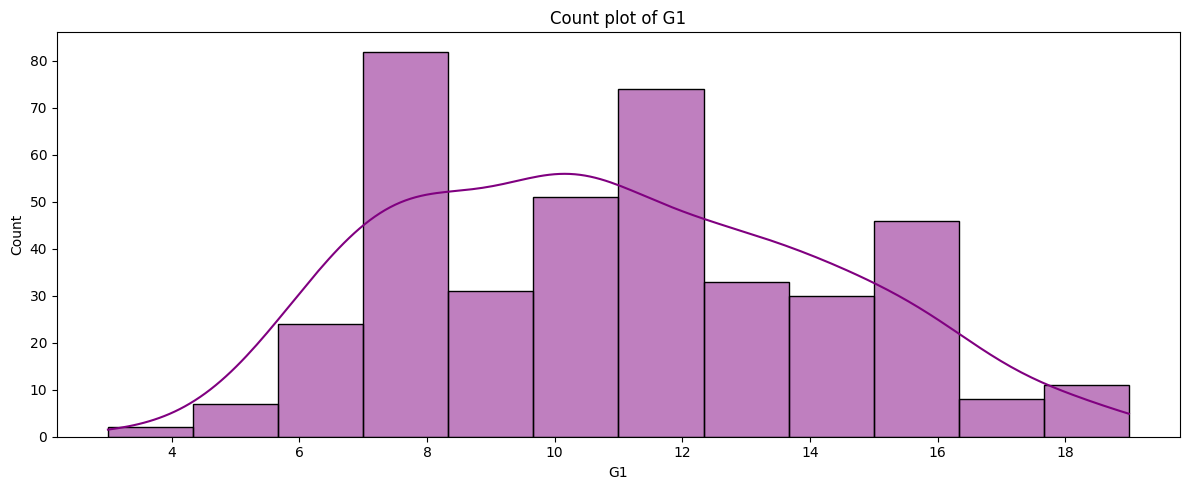

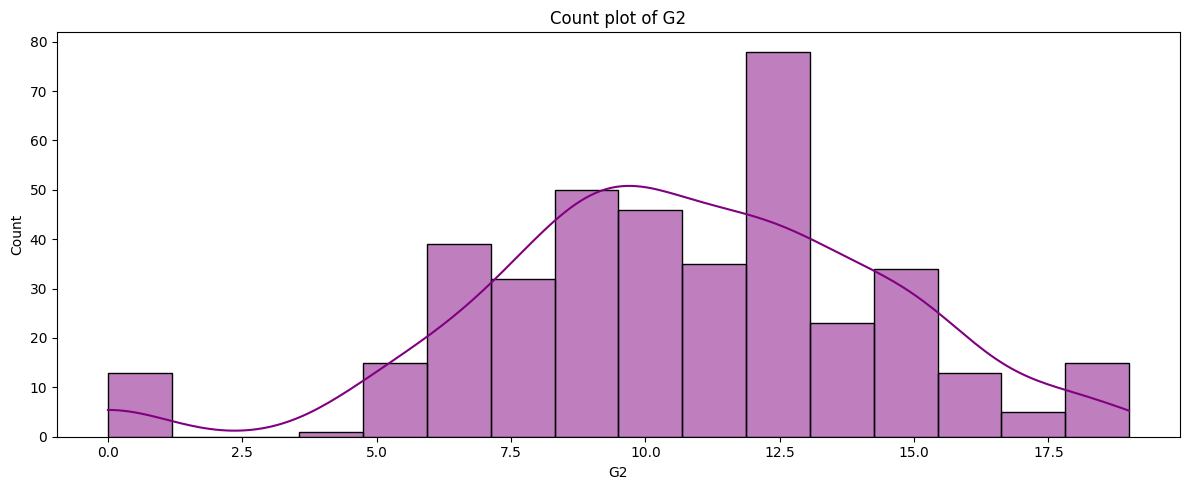

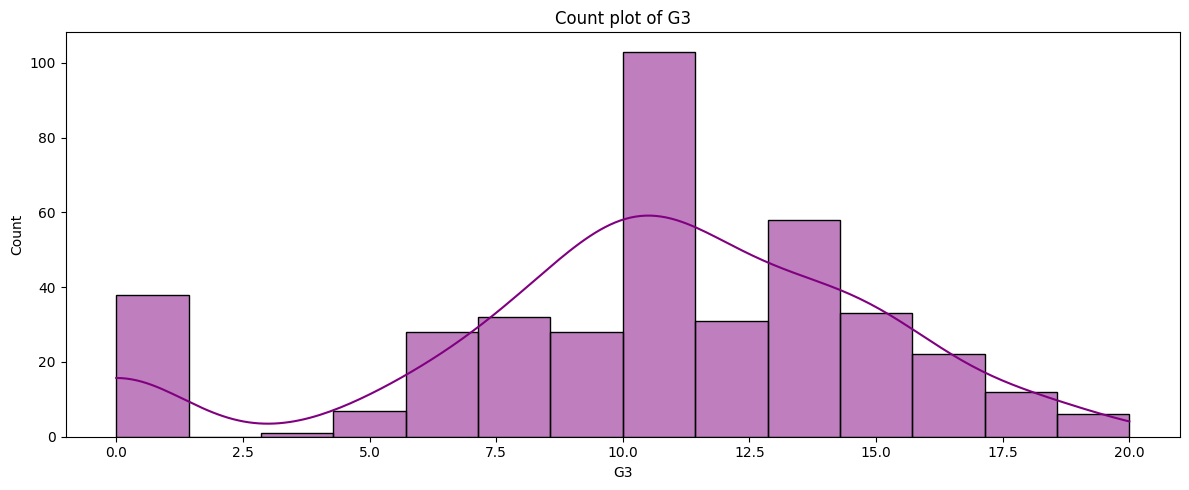

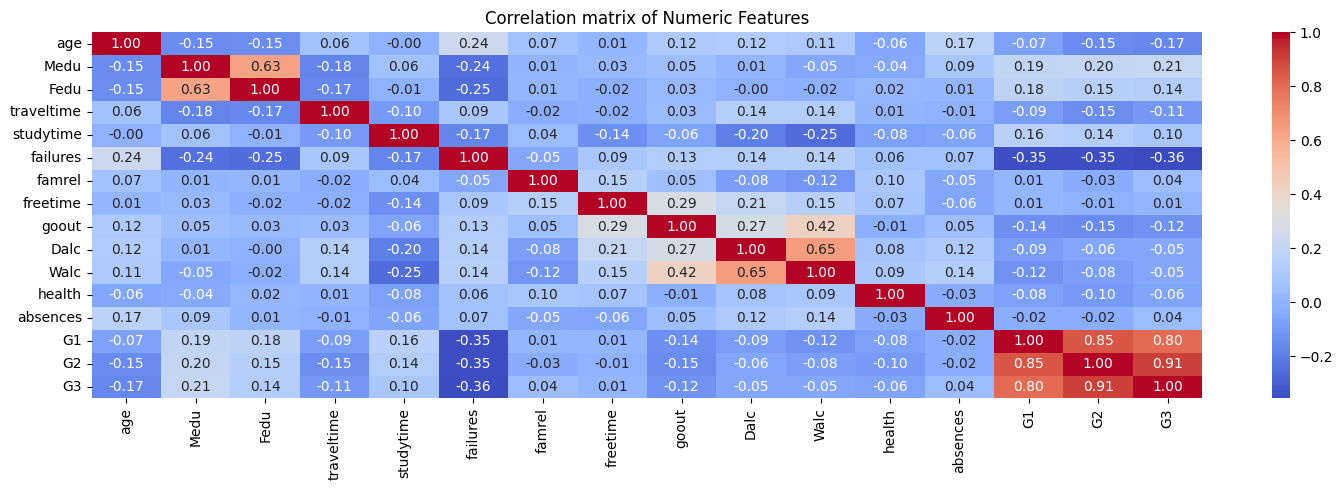

In [7]:
#Hist Plot

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.countplot(x=features,data=df,palette='viridis')
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()



#Count Plot

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.histplot(df[features].dropna(),kde=True,color='purple')
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()




# HEAT-MAP before Feature Engineering applied

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f"Correlation matrix of Numeric Features")
    plt.tight_layout()
    plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

# Featue Engineering

In [9]:
lab_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic','Mjob' ,'Fjob','reason','guardian']

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      399 non-null    int64
 1   sex         399 non-null    int64
 2   age         399 non-null    int64
 3   address     399 non-null    int64
 4   famsize     399 non-null    int64
 5   Pstatus     399 non-null    int64
 6   Medu        399 non-null    int64
 7   Fedu        399 non-null    int64
 8   Mjob        399 non-null    int64
 9   Fjob        399 non-null    int64
 10  reason      399 non-null    int64
 11  guardian    399 non-null    int64
 12  traveltime  399 non-null    int64
 13  studytime   399 non-null    int64
 14  failures    399 non-null    int64
 15  schoolsup   399 non-null    int64
 16  famsup      399 non-null    int64
 17  paid        399 non-null    int64
 18  activities  399 non-null    int64
 19  nursery     399 non-null    int64
 20  higher      399 non-null    int6

# HEAT-MAP after applying Feature Engineering.

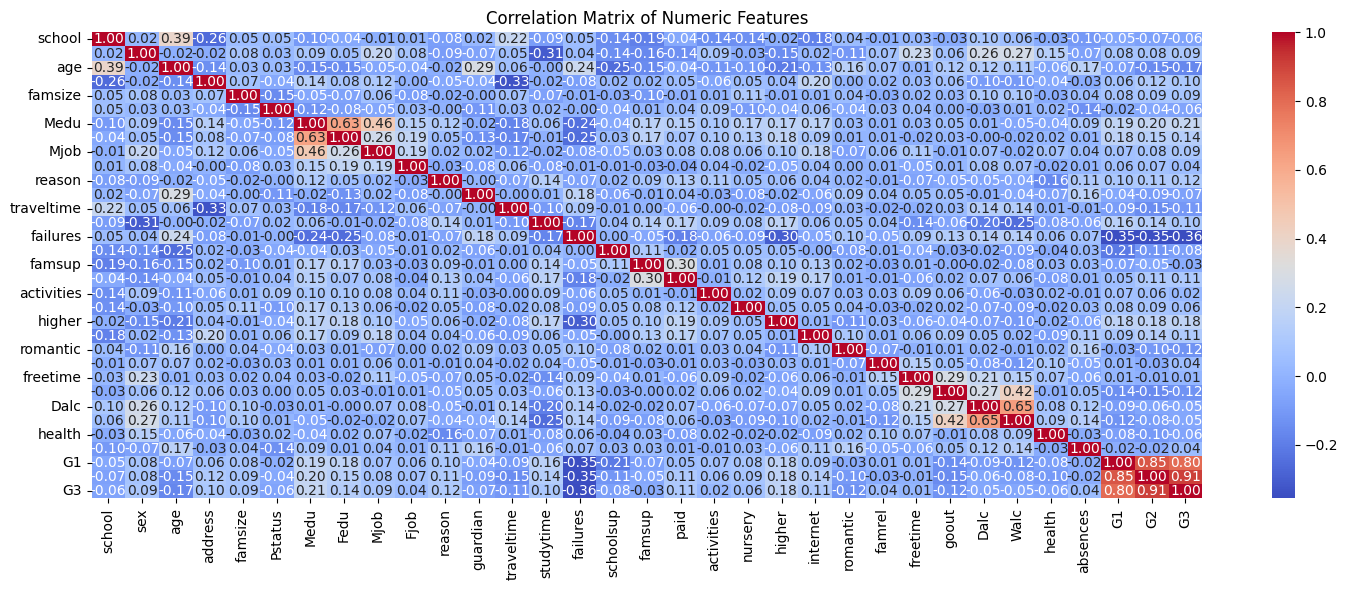

In [14]:
numeric_df2 = df.select_dtypes(include=[np.number])
if numeric_df2.shape[1] >=4:
    plt.figure(figsize=(15,6))
    correlation_matrix2 = numeric_df2.corr()
    sns.heatmap(correlation_matrix2,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

**Category	Influences G3 (Final Grade)**
> ✅ Strong Positive	G1, G2

> 🟡 Mild Positive	Medu, Fedu, studytime

> 🔵 Mild Negative	age, failures, goout, romantic, Dalc

> ⚪ Neutral	health, freetime, absences, activities

> age-G3 = -0.17 → Older students tend to score a bit lower.

> absences-G3 = -0.04 → Not much effect from absences.

> activities-G3 = 0.02 → Almost no relationship.

# Model Section

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [17]:
X  = df.drop(columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'G3'])
y = df['G3']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [20]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [21]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score     MSE    RMSE     MAE
5      RandomForest    0.7957  4.2208  2.0544  1.2443
3        ElasticNet    0.7757  4.6346  2.1528  1.1548
6  GradientBoosting    0.7713  4.7238  2.1734  1.2642
0  LinearRegression    0.7699  4.7537  2.1803  1.2114
1             Ridge    0.7699  4.7529  2.1801  1.2112
2             Lasso    0.7678  4.7972  2.1902  1.1754
8        KNeighbors    0.7473  5.2210  2.2850  1.4200
9           XGBoost    0.7460  5.2471  2.2907  1.3599
7          AdaBoost    0.7418  5.3332  2.3094  1.3507
4      DecisionTree    0.7057  6.0802  2.4658  1.3438


# Applying Cross-Val

In [22]:
from sklearn.model_selection import cross_val_score
# Scoring functions
scoring_metrics = {
    "r2": "r2",
    "mse": make_scorer(mean_squared_error, greater_is_better=False),
    "mae": make_scorer(mean_absolute_error, greater_is_better=False)
}



In [23]:
# Results storage
results_crs = []

# Perform cross-validation
for name, model in models.items():
    r2_scores = cross_val_score(model, X, y, cv=5, scoring=scoring_metrics["r2"])
    mse_scores = cross_val_score(model, X, y, cv=5, scoring=scoring_metrics["mse"])
    mae_scores = cross_val_score(model, X, y, cv=5, scoring=scoring_metrics["mae"])
    
    results_crs.append({
        "Model": name,
        "R2 (mean)": r2_scores.mean(),
        "MSE (mean)": -mse_scores.mean(),
        "RMSE (mean)": np.sqrt(-mse_scores.mean()),
        "MAE (mean)": -mae_scores.mean()
    })



In [24]:
# Display results
results_df = pd.DataFrame(results_crs)
results_df = results_df.sort_values(by="R2 (mean)", ascending=False).reset_index(drop=True)
print(results_df)

              Model  R2 (mean)  MSE (mean)  RMSE (mean)  MAE (mean)
0             Ridge   0.811766    3.810740     1.952112    1.161680
1  LinearRegression   0.811737    3.811551     1.952319    1.162257
2             Lasso   0.809972    3.870711     1.967412    1.090923
3        ElasticNet   0.809334    3.863752     1.965643    1.114832
4      RandomForest   0.795798    3.983077     1.995765    1.248327
5        KNeighbors   0.794014    4.039311     2.009804    1.222291
6  GradientBoosting   0.793743    4.122123     2.030301    1.262506
7           XGBoost   0.707932    5.769813     2.402043    1.523590
8          AdaBoost   0.705691    5.969462     2.443248    1.650371
9      DecisionTree   0.693174    6.346450     2.519216    1.335390


# CONCLUSION:

**Result without Cross-Val**
> Achieving `~80%` by `RandomForest`.

> All Models giving results Around the range of `~ 70-80 %`.

> After Applying Cross-val probably result will increase.


**Results After Cross-Val**
> Achieving `~82%` by `Ridge` and  `LinearRegression`.

> One more thing is need to notice that if the `R2-Score` increase the `RMSE`,`MSE`,`MAE` decreases. As we see in `DecisionTree`.

